In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('Scores').getOrCreate()

dataset = spark.read.option("inferSchema", "true").csv("Player_List_Cleaned_Data.csv", header=True)

dataset.show()

+--------------------+--------------+-------------------+-------------+---------------+------------+-------------+------+------+----+--------------+--------------+----------------+----------+--------------+---------------+-----------+------------------+------------------+------------------+-----------------+--------+-----------+--------------------+
|              Player|       Country|               Club|Overall_Score|Potential_Score|Market_Value|Weekly_Salary|Height|Weight| Age|Preferred_Foot|      Position|Player_Work_Rate|Kit_Number|   Joined_Club|Contract_Length|Ball_Skills|           Defence|            Mental|           Passing|         Physical|Shooting|Goalkeeping|  Description_Player|
+--------------------+--------------+-------------------+-------------+---------------+------------+-------------+------+------+----+--------------+--------------+----------------+----------+--------------+---------------+-----------+------------------+------------------+------------------+-----

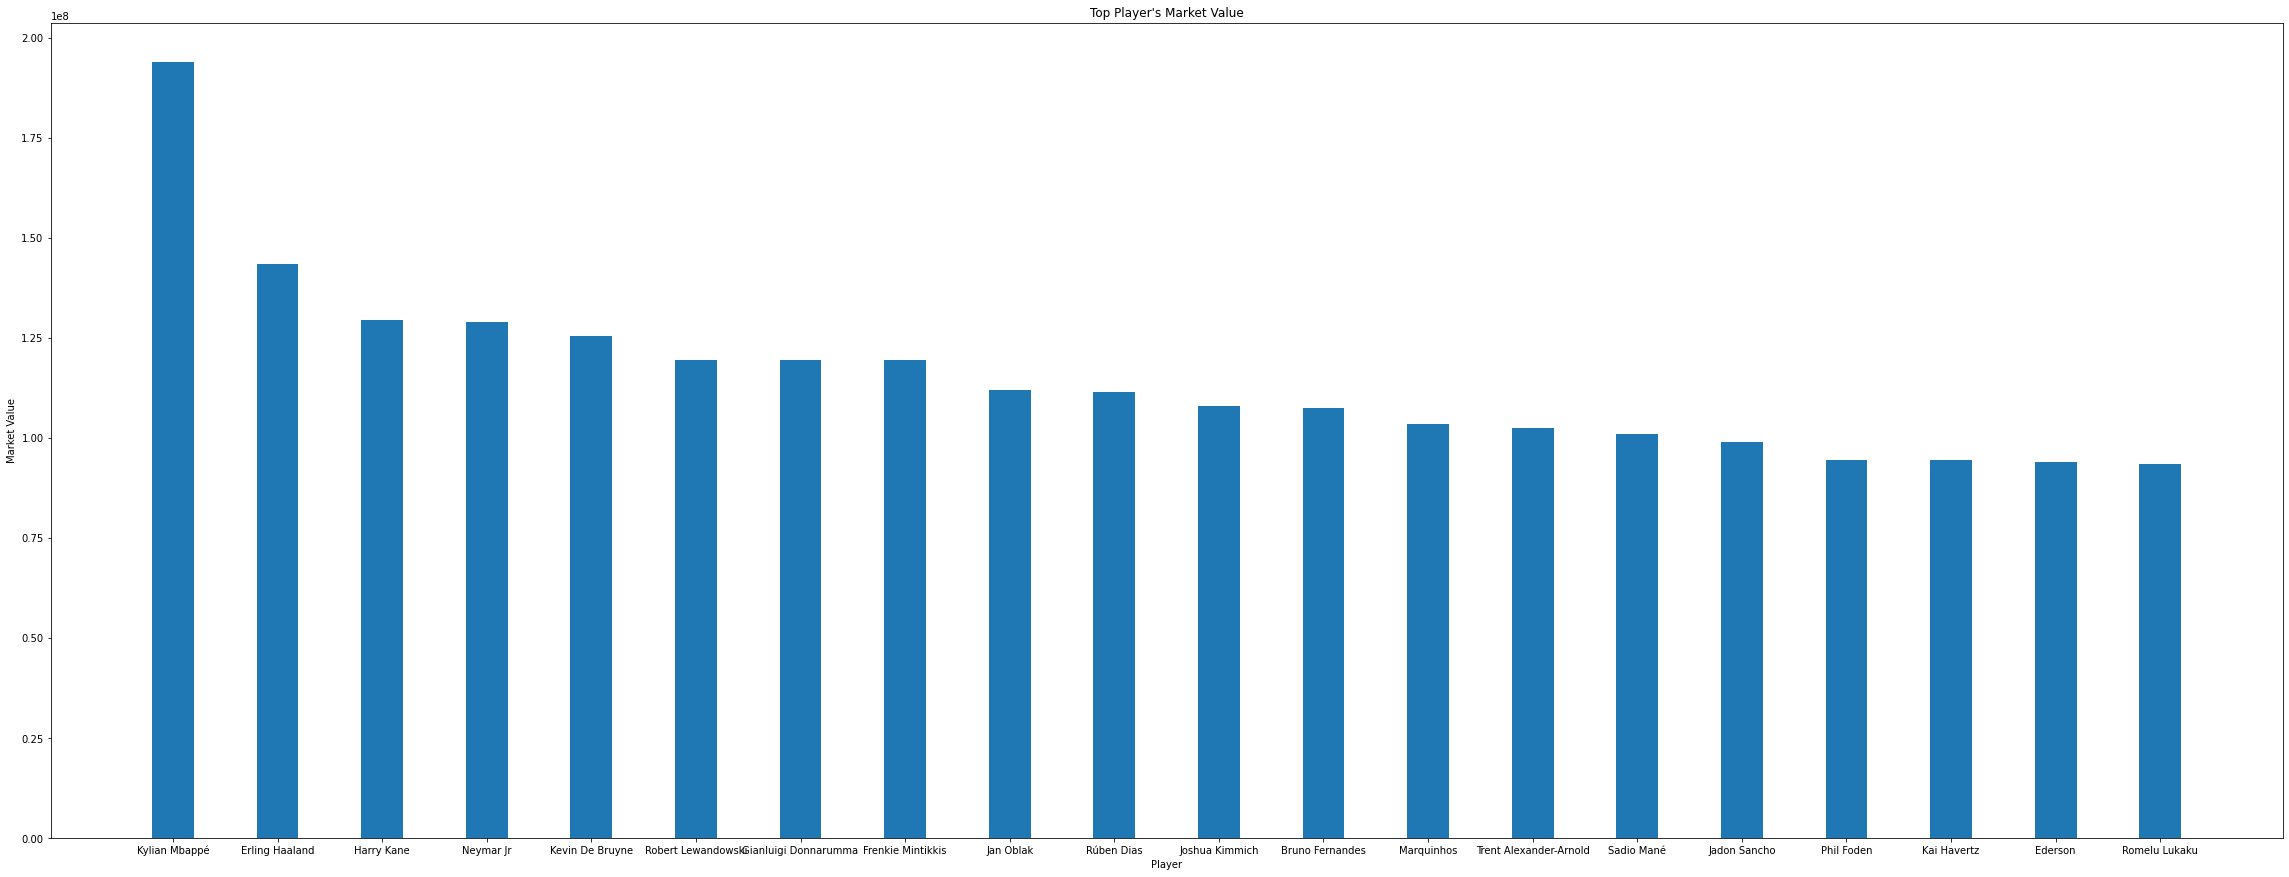

In [63]:
# Top 20 Max Playeres's Market Value
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Market_Value FROM table ORDER BY Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Market_Value'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Market Value")
plt.title("Top Player's Market Value")
plt.savefig('Top_20_cau_thu_co_gia_tri_chuyen_nhuong_cao_nhat.png', transparent=True, bbox_inches='tight')

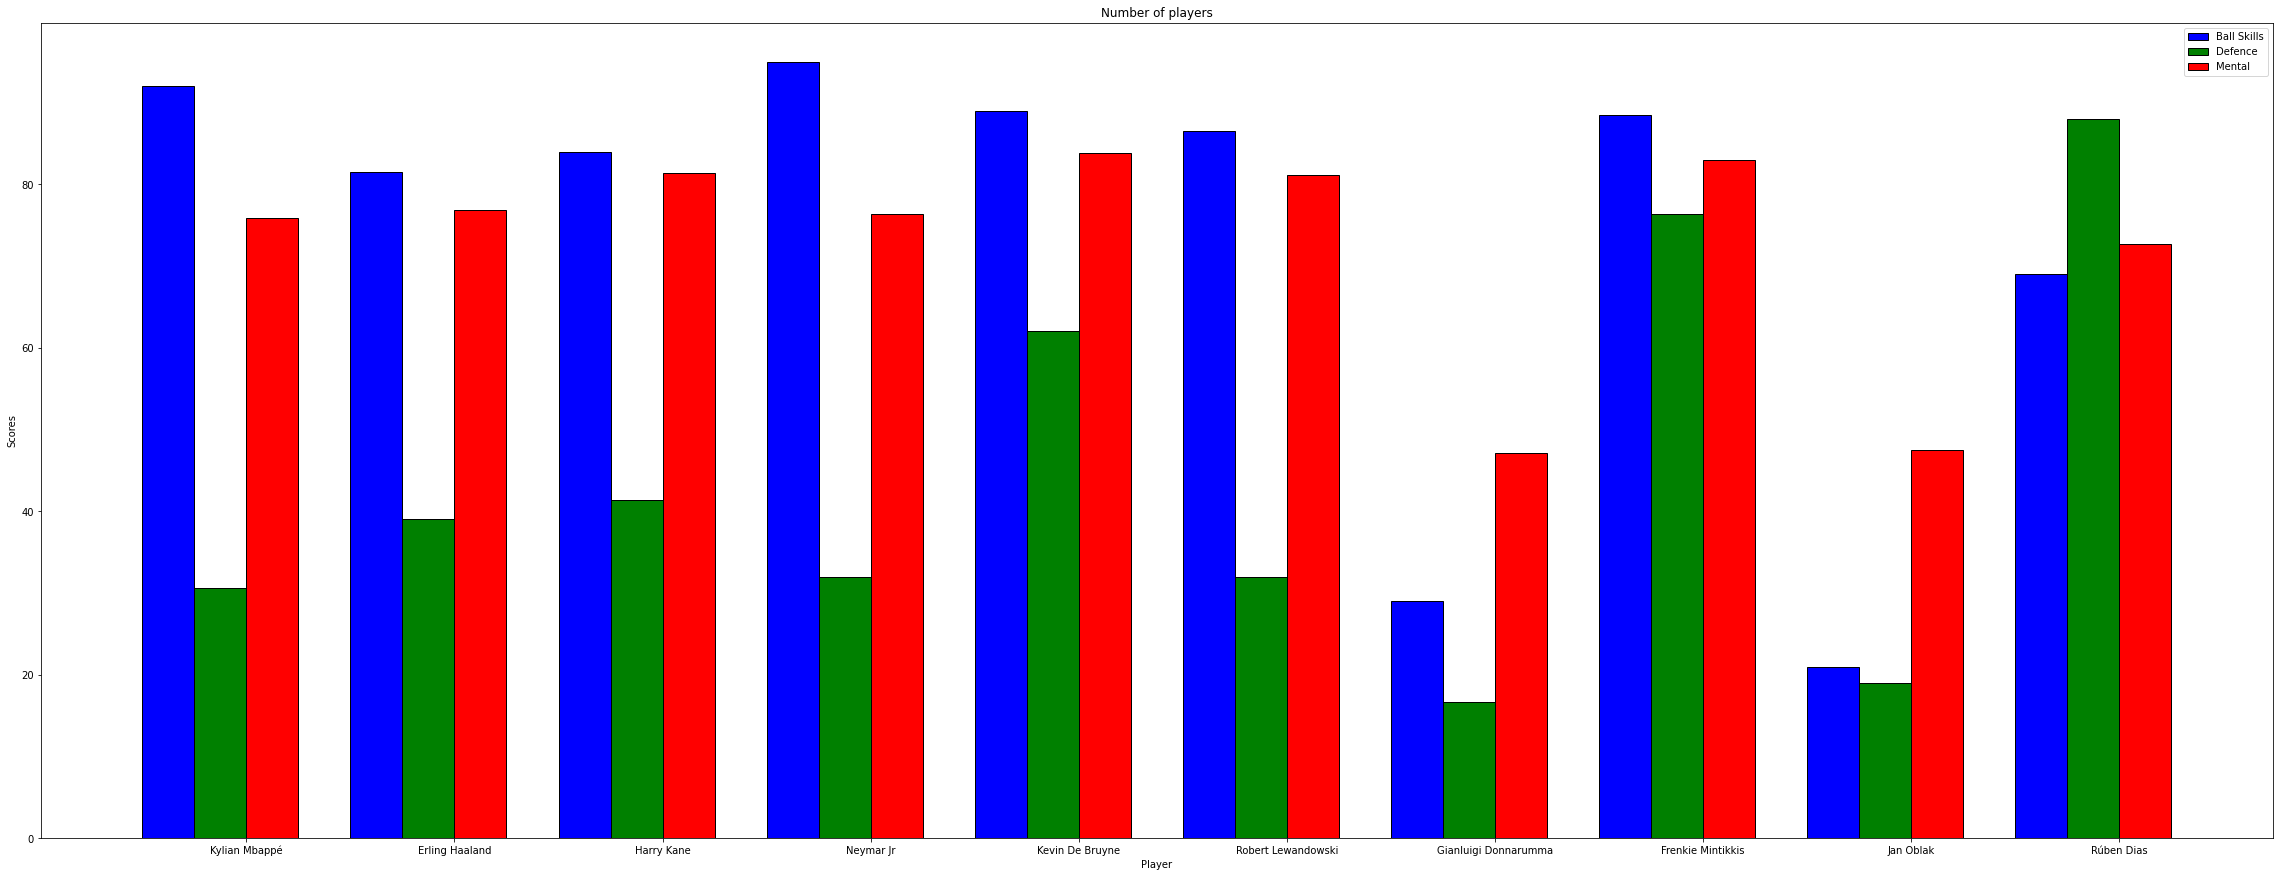

In [64]:
# Ball_Skills, Defence and Mental of top 10 max players's market value
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Market_Value, Ball_Skills, Defence, Mental, Passing, Physical, Shooting, Goalkeeping FROM table ORDER BY Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))

n=10
r = np.arange(n)
width = 0.25
  
  
plt.bar(r - width, df1['Ball_Skills'].to_numpy()[0:10], color = 'b',
        width = width, edgecolor = 'black',
        label='Ball Skills')
plt.bar(r, df1['Defence'].to_numpy()[0:10], color = 'g',
        width = width, edgecolor = 'black',
        label='Defence')
plt.bar(r + width, df1['Mental'].to_numpy()[0:10], color = 'r',
        width = width, edgecolor = 'black',
        label='Mental')
  
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Number of players")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, df1['Player'].to_numpy()[0:10])
plt.legend()
plt.savefig('BallSkills_Defence_Mental_cua_10_cau_thu_co_gia_tri_chuyen_nhuong_cao_nhat.png', transparent=True, bbox_inches='tight')

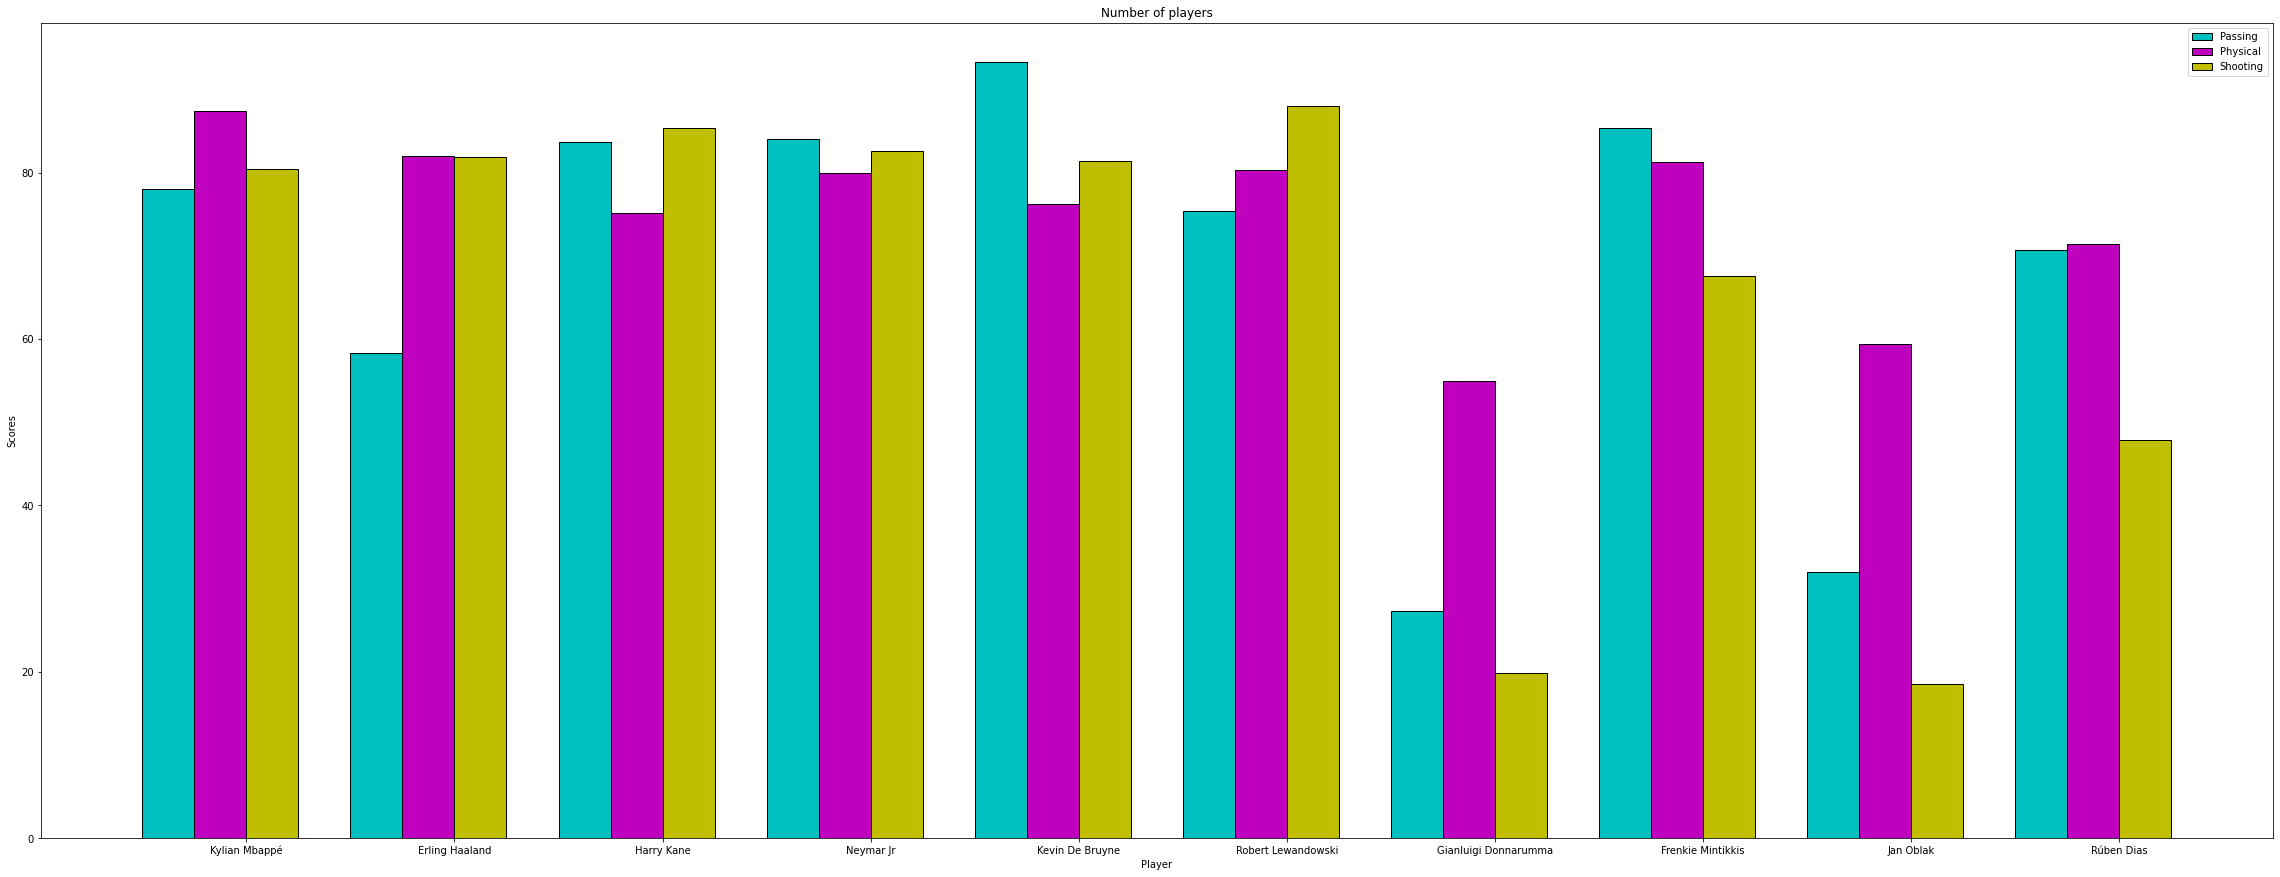

In [65]:
# Passing, Physical and Shooting of top 10 max players's market value
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Market_Value, Ball_Skills, Defence, Mental, Passing, Physical, Shooting, Goalkeeping FROM table ORDER BY Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))

n=10
r = np.arange(n)
width = 0.25
  
plt.bar(r - width, df1['Passing'].to_numpy()[0:10], color = 'c',
        width = width, edgecolor = 'black',
        label='Passing') 
plt.bar(r, df1['Physical'].to_numpy()[0:10], color = 'm',
        width = width, edgecolor = 'black',
        label='Physical')
plt.bar(r + width, df1['Shooting'].to_numpy()[0:10], color = 'y',
        width = width, edgecolor = 'black',
        label='Shooting')
  
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Number of players")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, df1['Player'].to_numpy()[0:10])
plt.legend()
plt.savefig('Passing_Physical_Shooting_cua_10_cau_thu_co_gia_tri_chuyen_nhuong_cao_nhat.png', transparent=True, bbox_inches='tight')

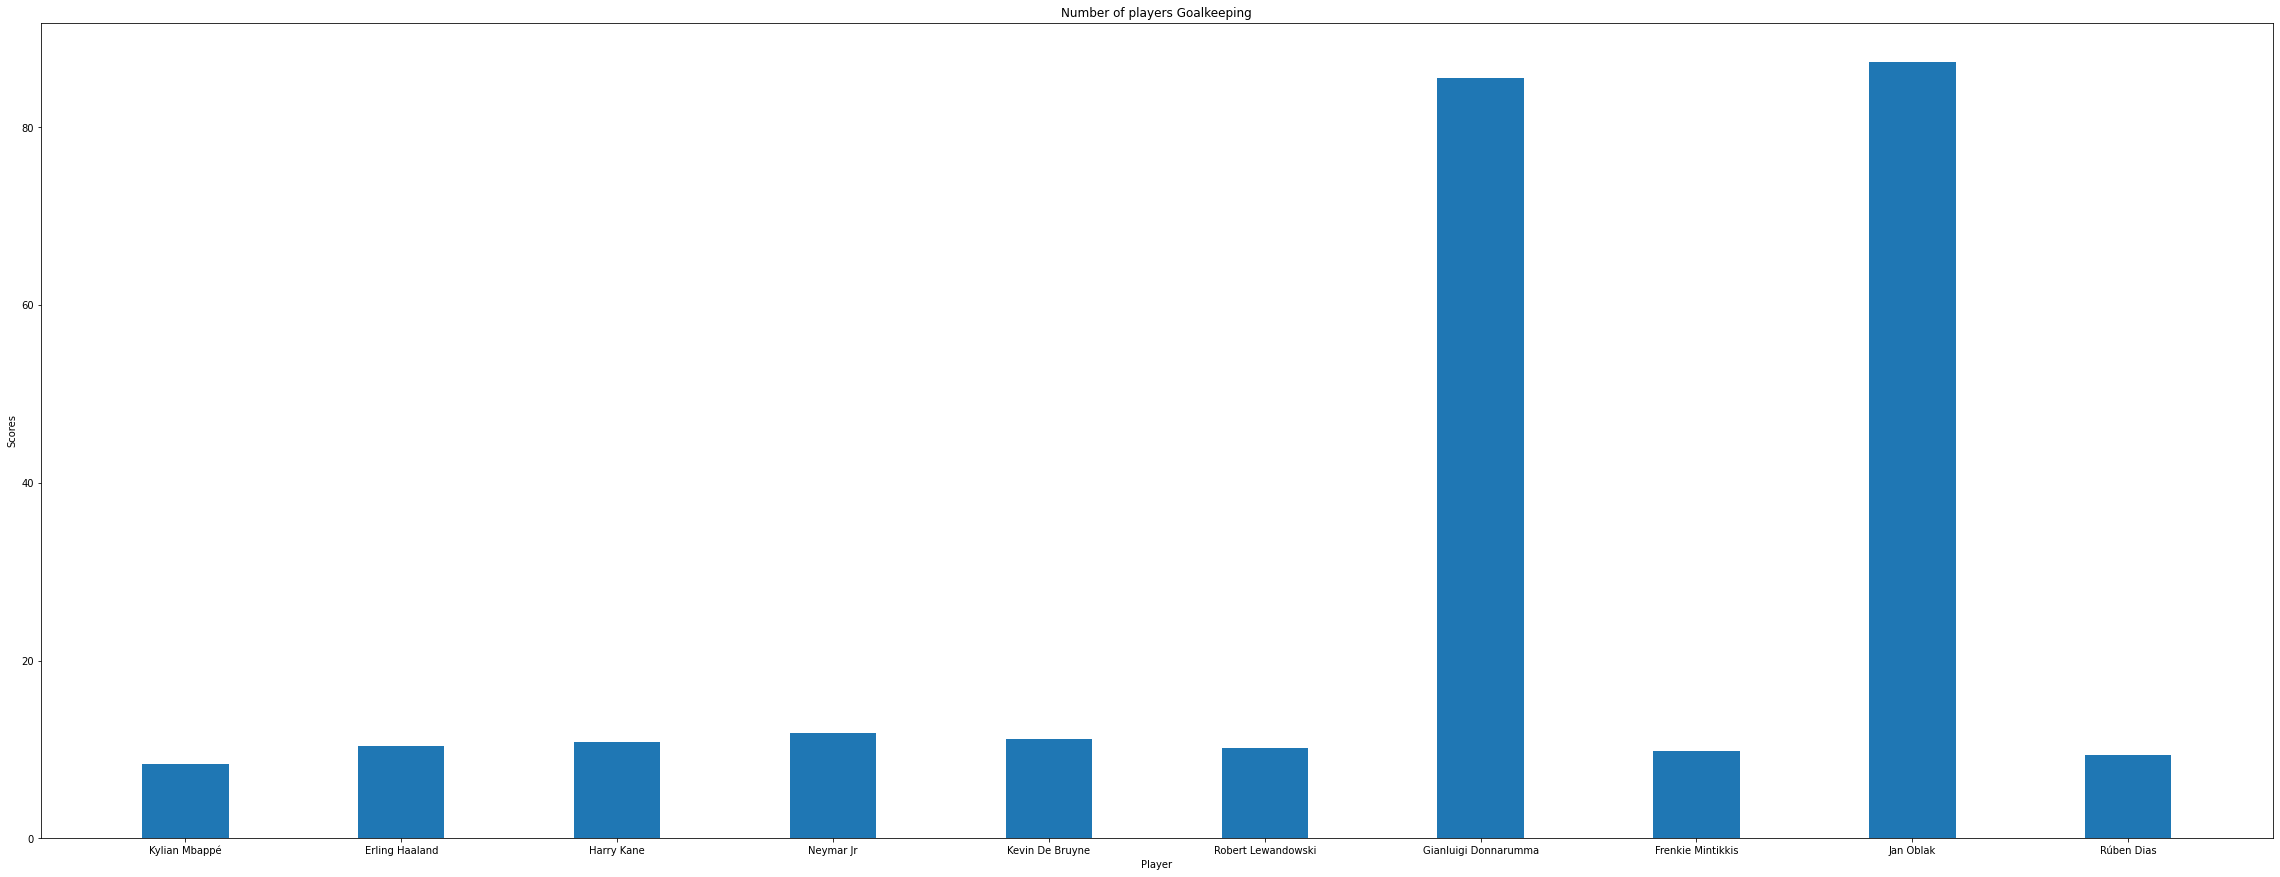

In [66]:
# Goalkeeping of top 10 max players's market value
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Market_Value, Ball_Skills, Defence, Mental, Passing, Physical, Shooting, Goalkeeping FROM table ORDER BY Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:10], df1['Goalkeeping'].to_numpy()[0:10], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Number of players Goalkeeping")
plt.savefig('Goalkeeping_cua_10_cau_thu_co_gia_tri_chuyen_nhuong_cao_nhat.png', transparent=True, bbox_inches='tight')

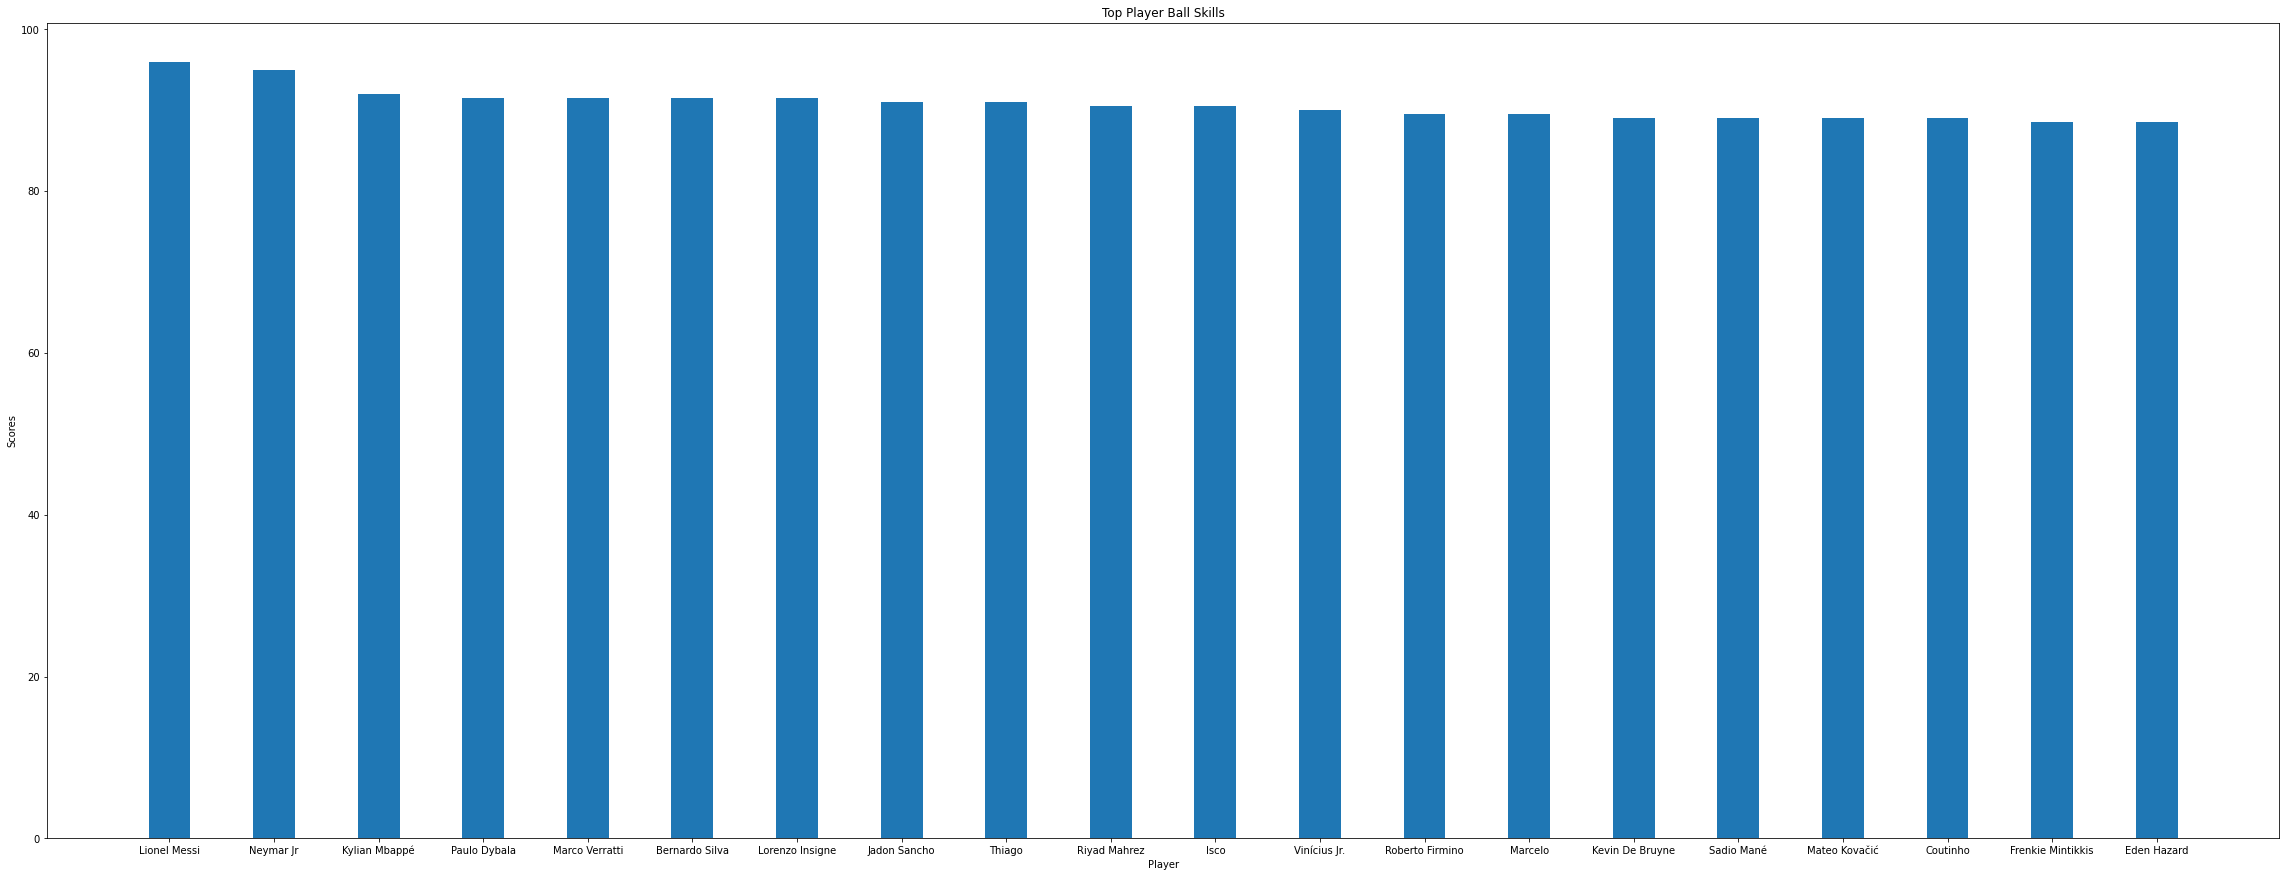

In [67]:
# Top 20 cầu thủ có Ball_Skills cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Ball_Skills FROM table ORDER BY Ball_Skills DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Ball_Skills'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Ball Skills")
plt.savefig('Top_20_cau_thu_co_BallSkills_cao_nhat.png', transparent=True, bbox_inches='tight')

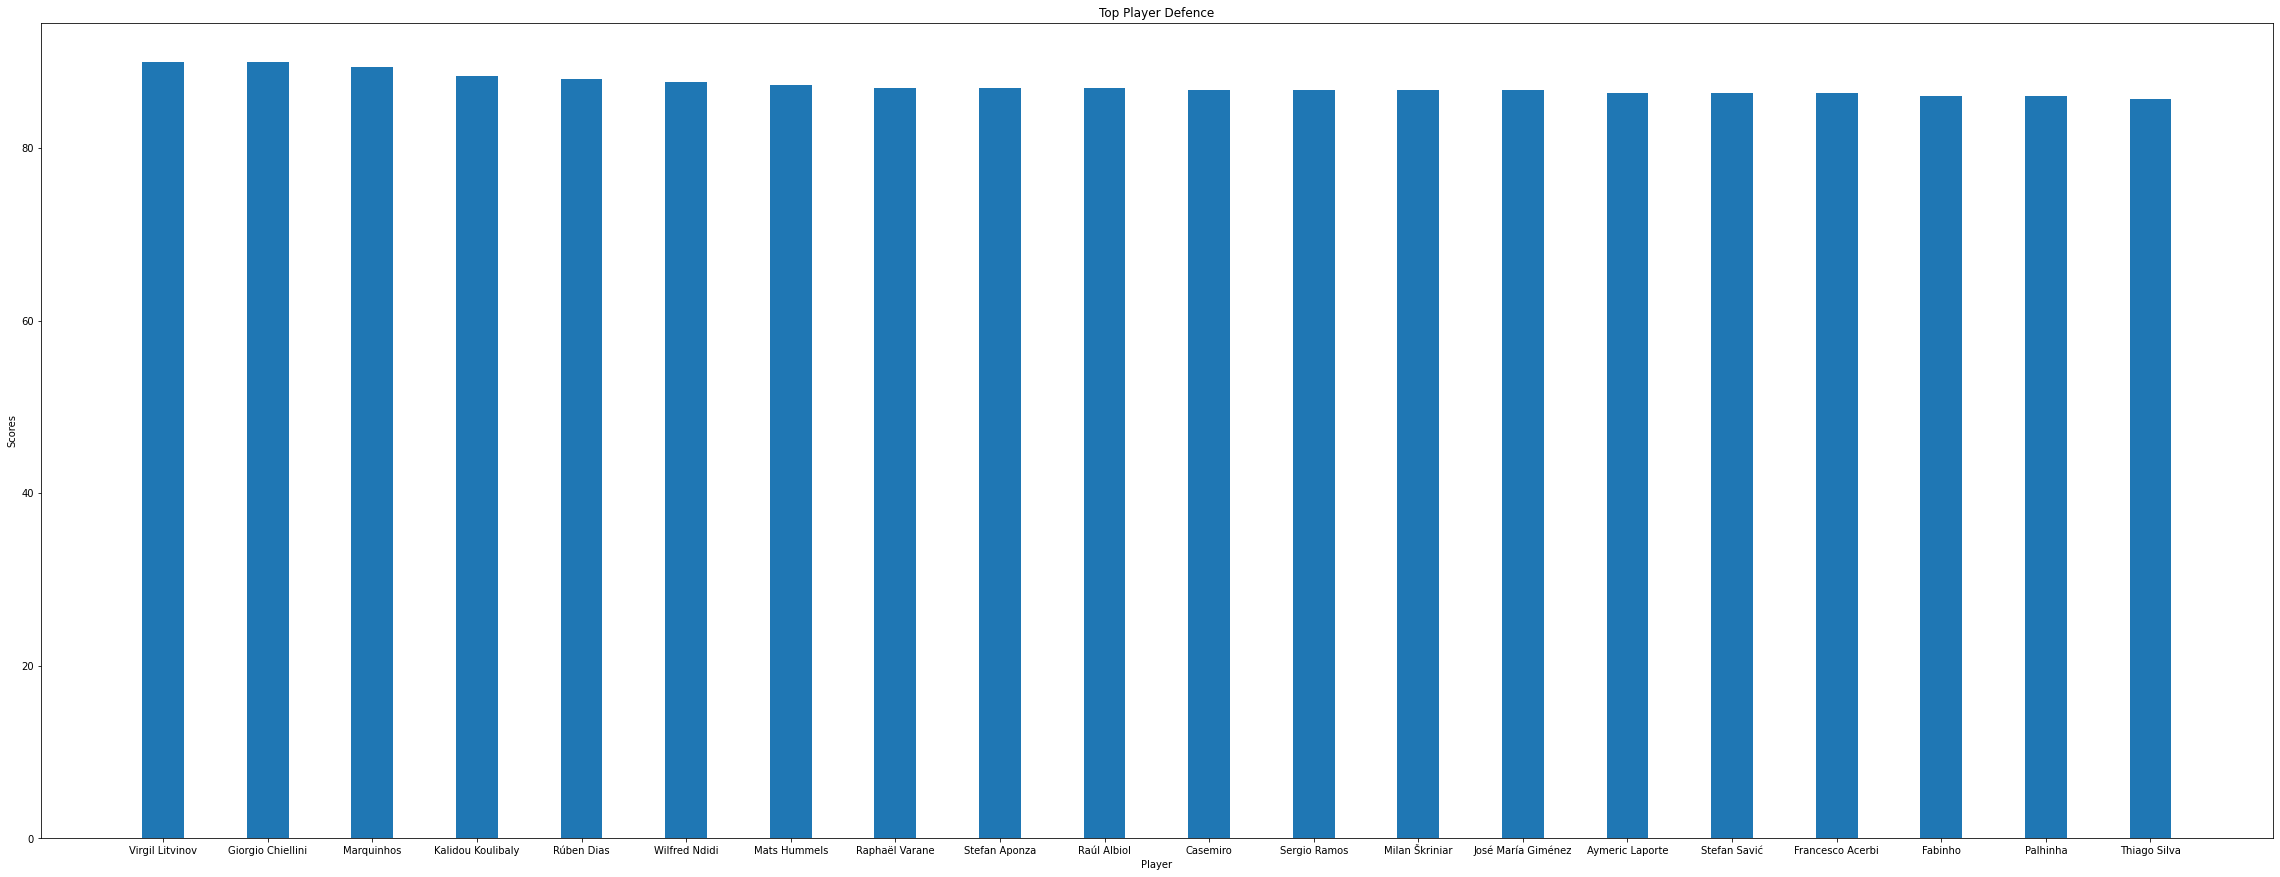

In [68]:
# Top 20 cầu thủ có Defence cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Defence FROM table ORDER BY Defence DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Defence'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Defence")
plt.savefig('Top_20_cau_thu_co_Defence_cao_nhat.png', transparent=True, bbox_inches='tight')

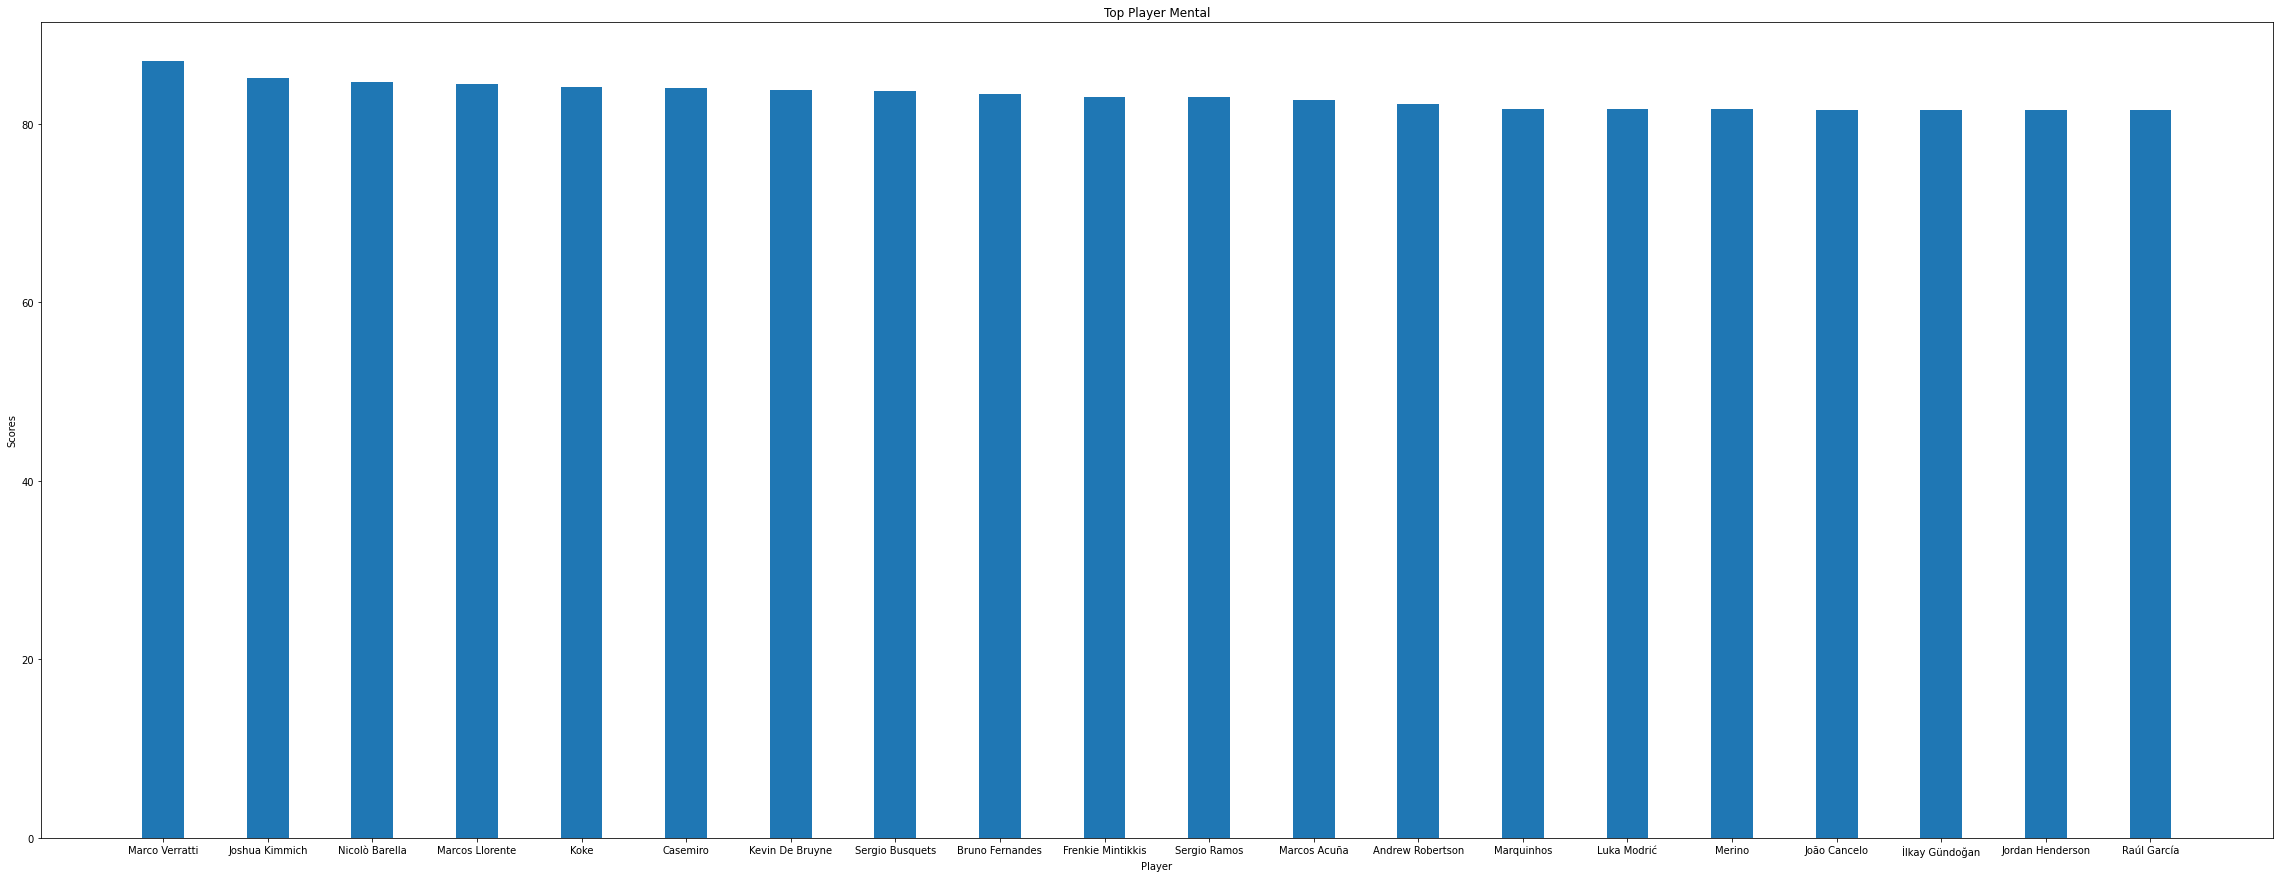

In [69]:
# Top 20 cầu thủ có Mental cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Mental FROM table ORDER BY Mental DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Mental'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Mental")
plt.savefig('Top_20_cau_thu_co_Mental_cao_nhat.png', transparent=True, bbox_inches='tight')

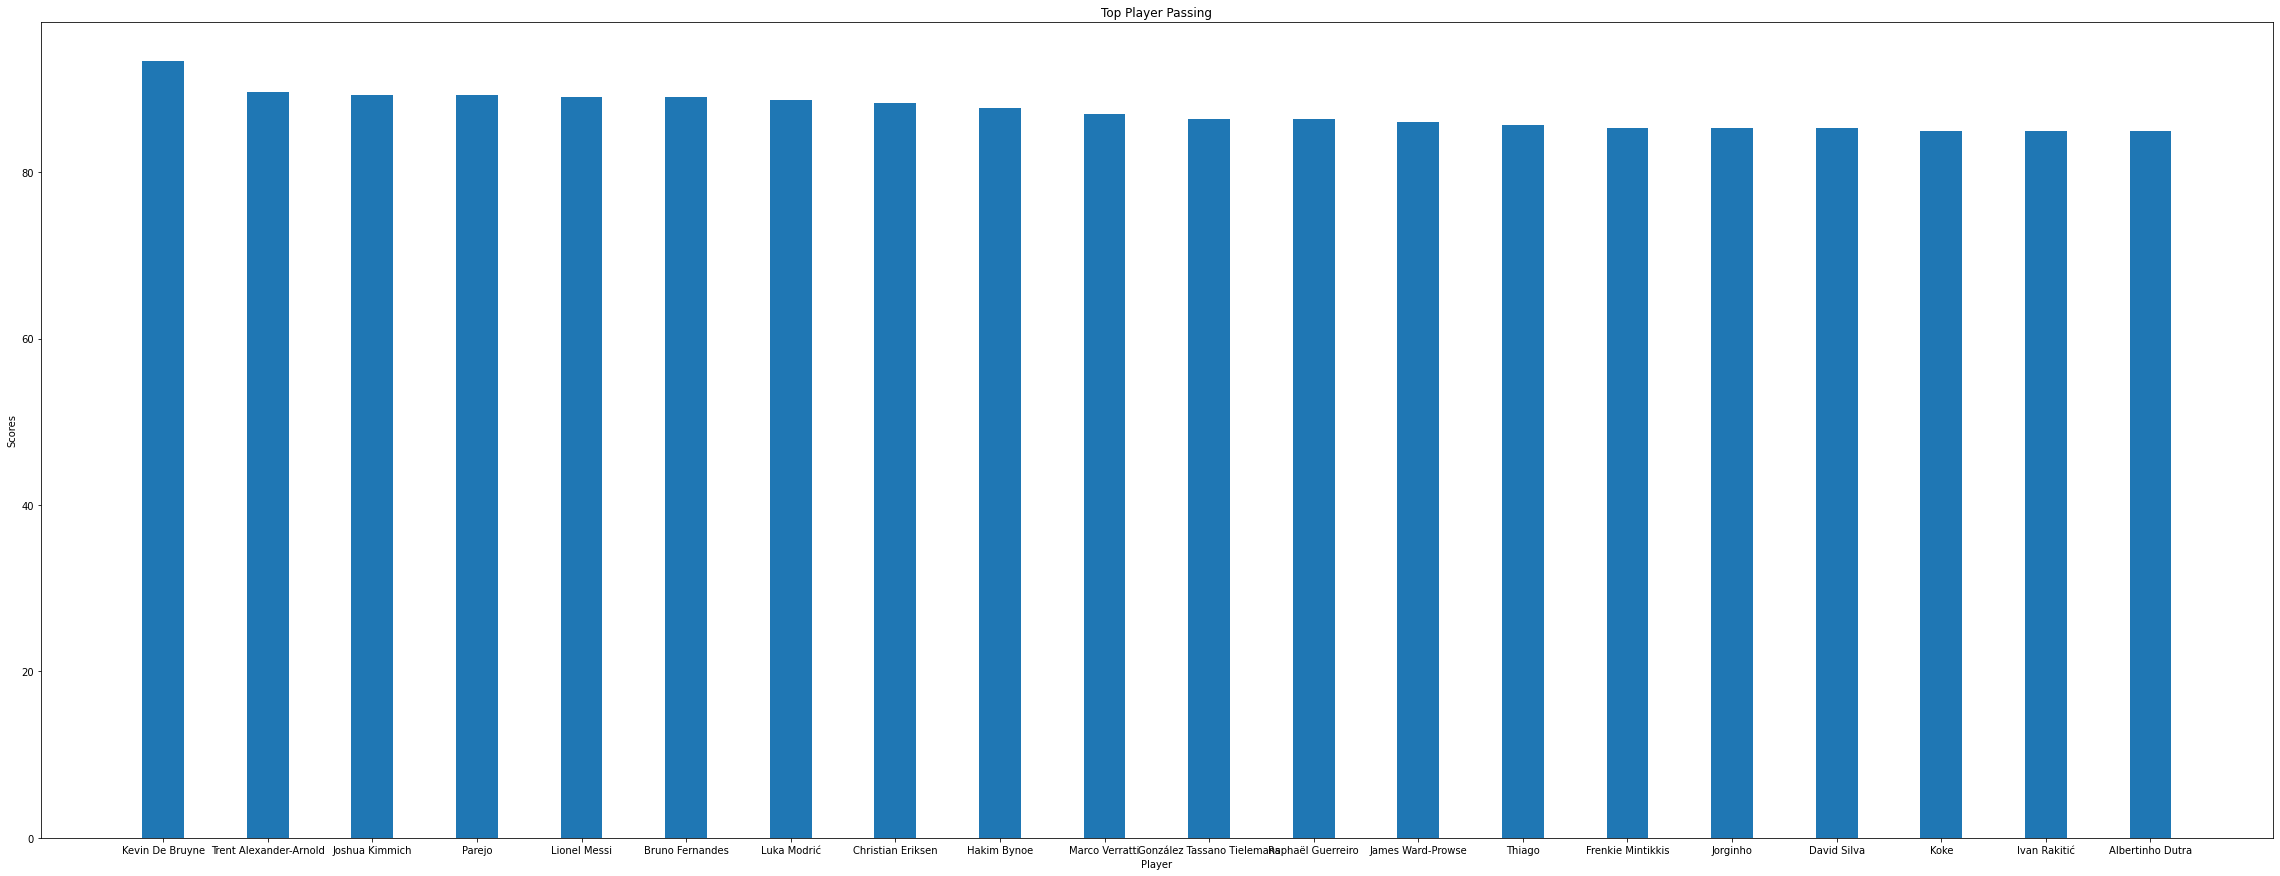

In [70]:
# Top 20 cầu thủ có Passing cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Passing FROM table ORDER BY Passing DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Passing'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Passing")
plt.savefig('Top_20_cau_thu_co_Passing_cao_nhat.png', transparent=True, bbox_inches='tight')

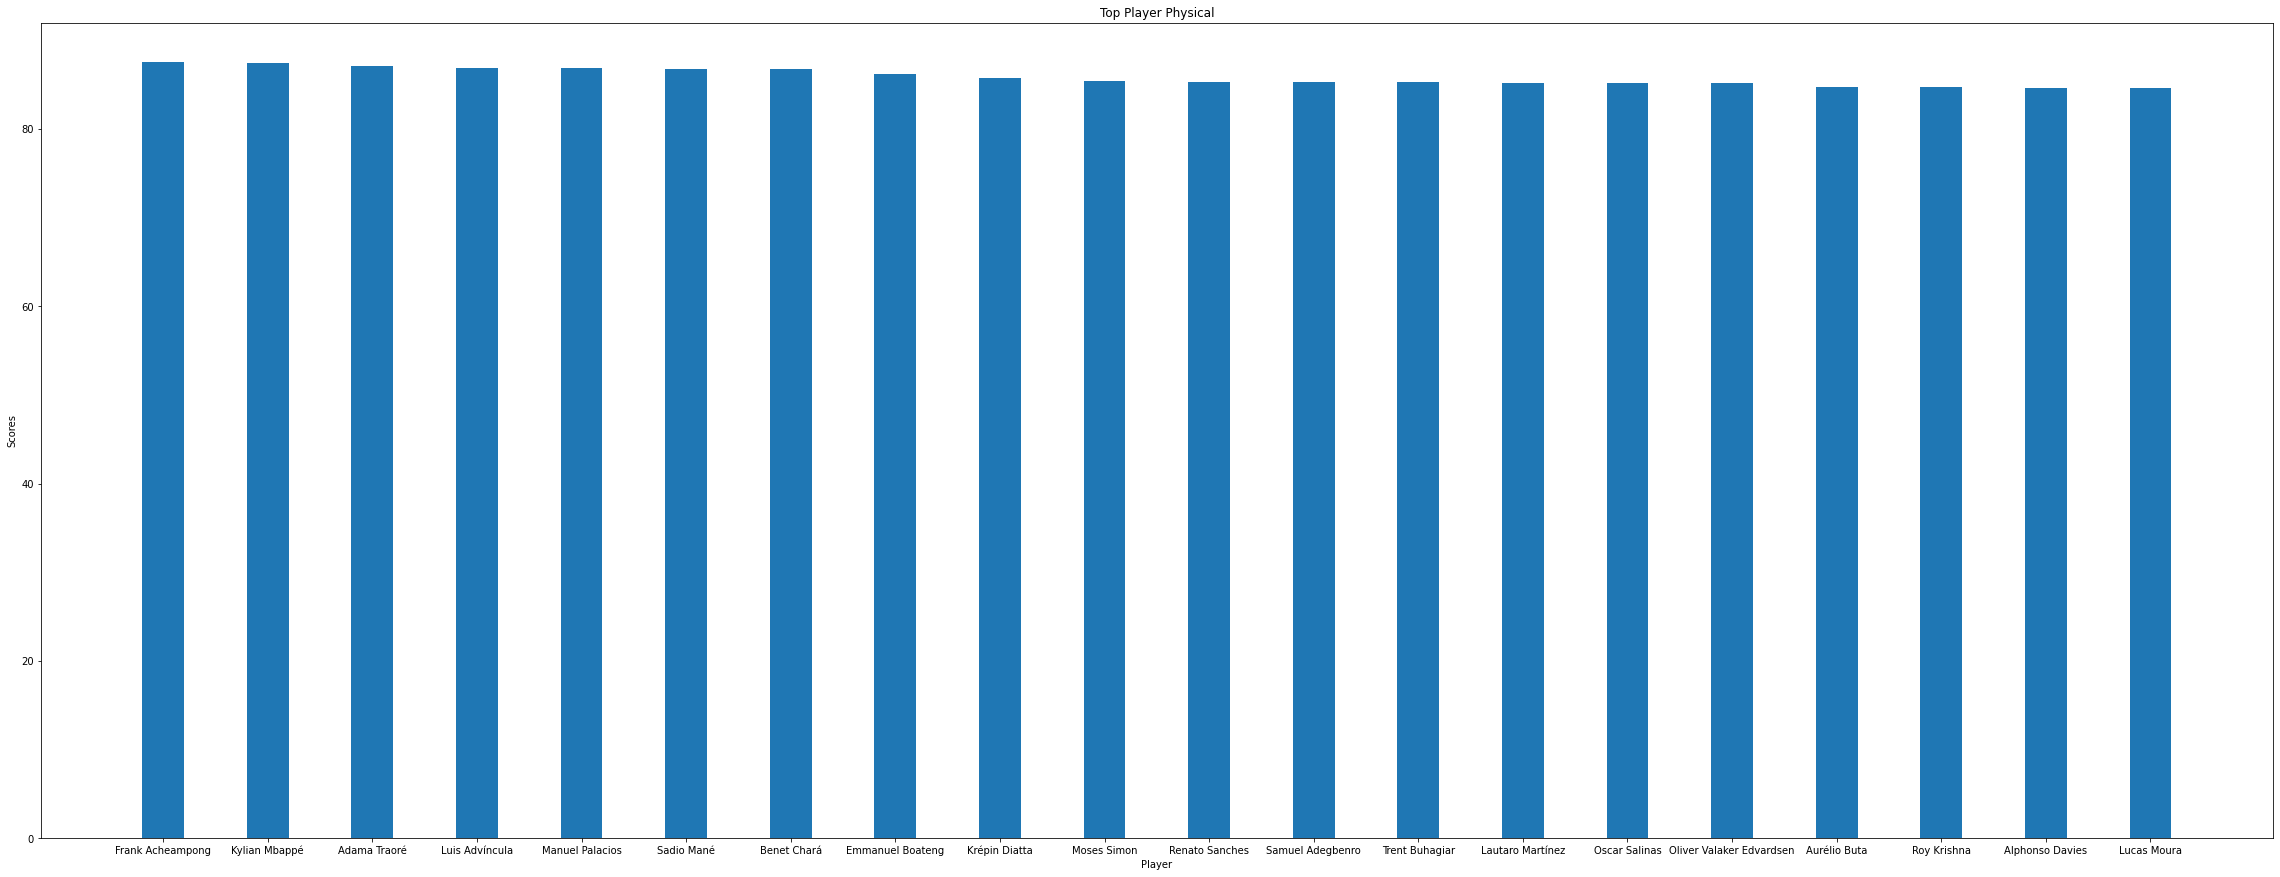

In [71]:
# Top 20 cầu thủ có Physical cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Physical FROM table ORDER BY Physical DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Physical'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Physical")
plt.savefig('Top_20_cau_thu_co_Physical_cao_nhat.png', transparent=True, bbox_inches='tight')

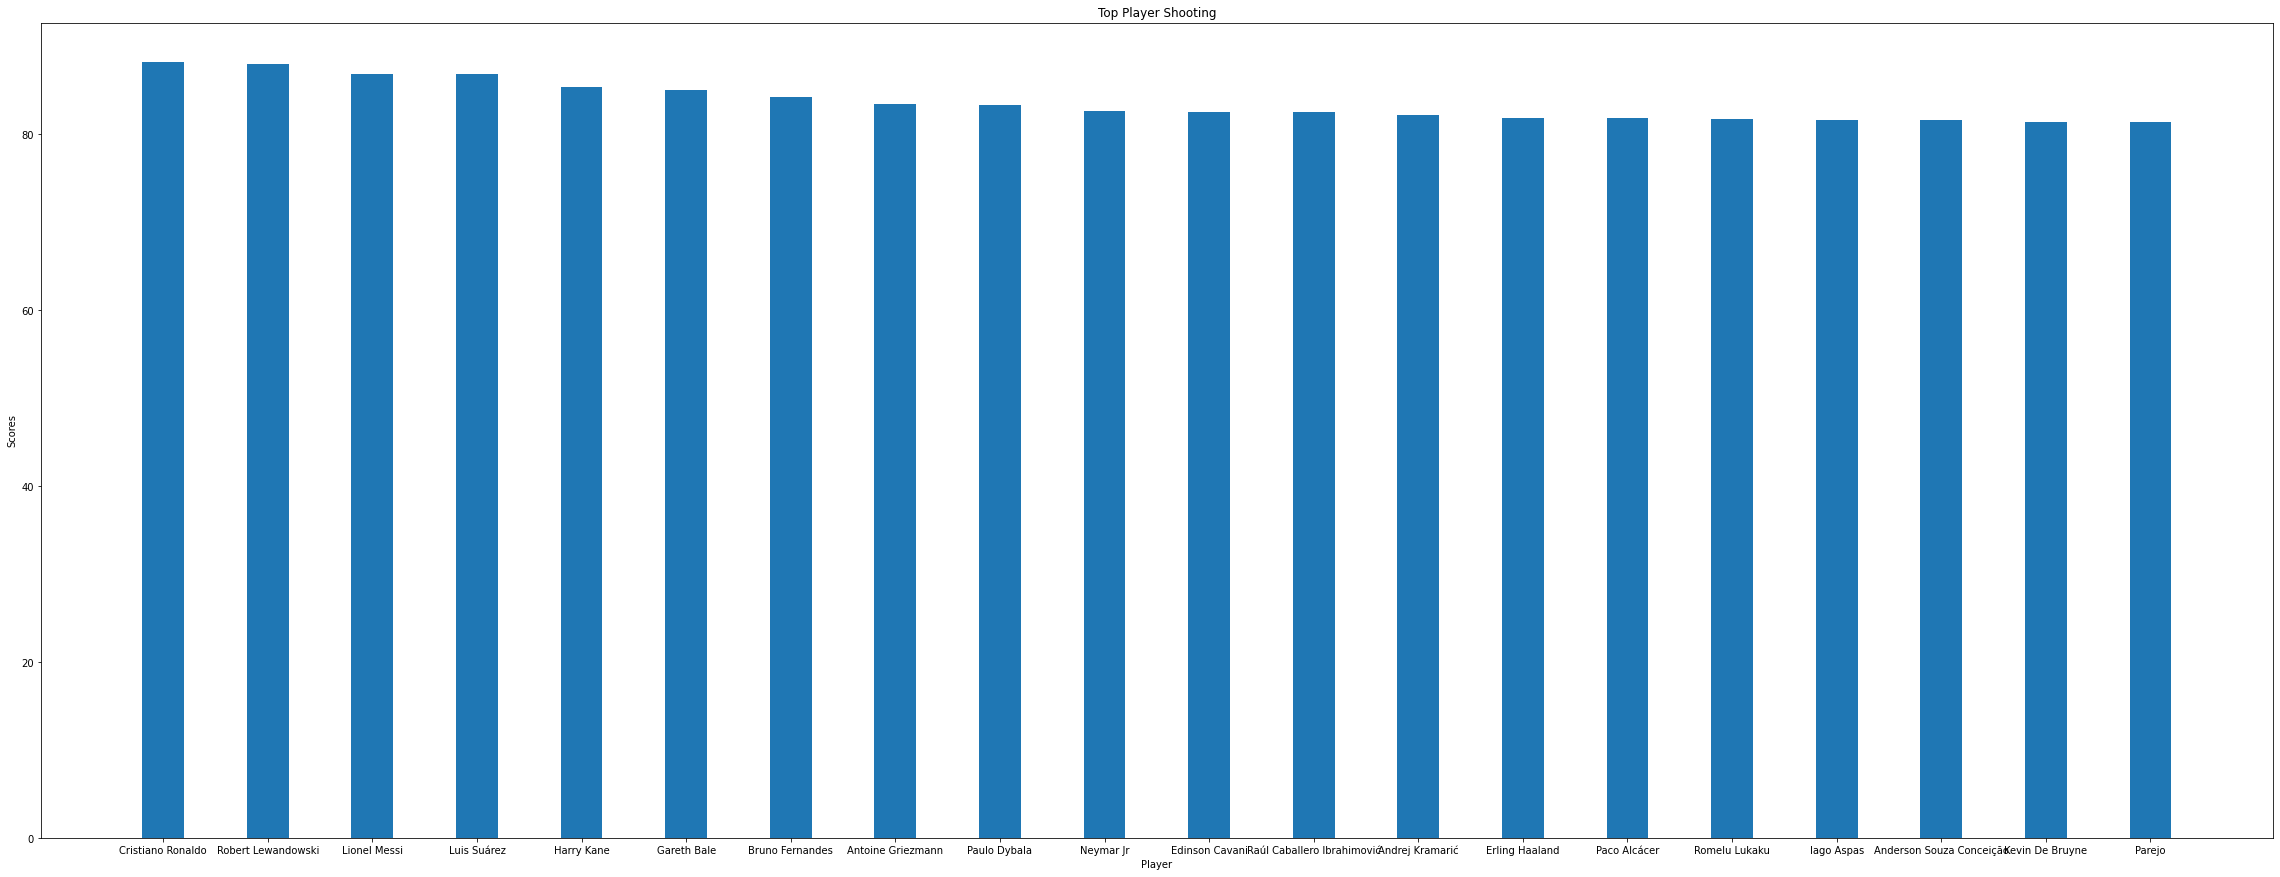

In [72]:
# Top 20 cầu thủ có Shooting cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Shooting FROM table ORDER BY Shooting DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Shooting'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Shooting")
plt.savefig('Top_20_cau_thu_co_Shooting_cao_nhat.png', transparent=True, bbox_inches='tight')

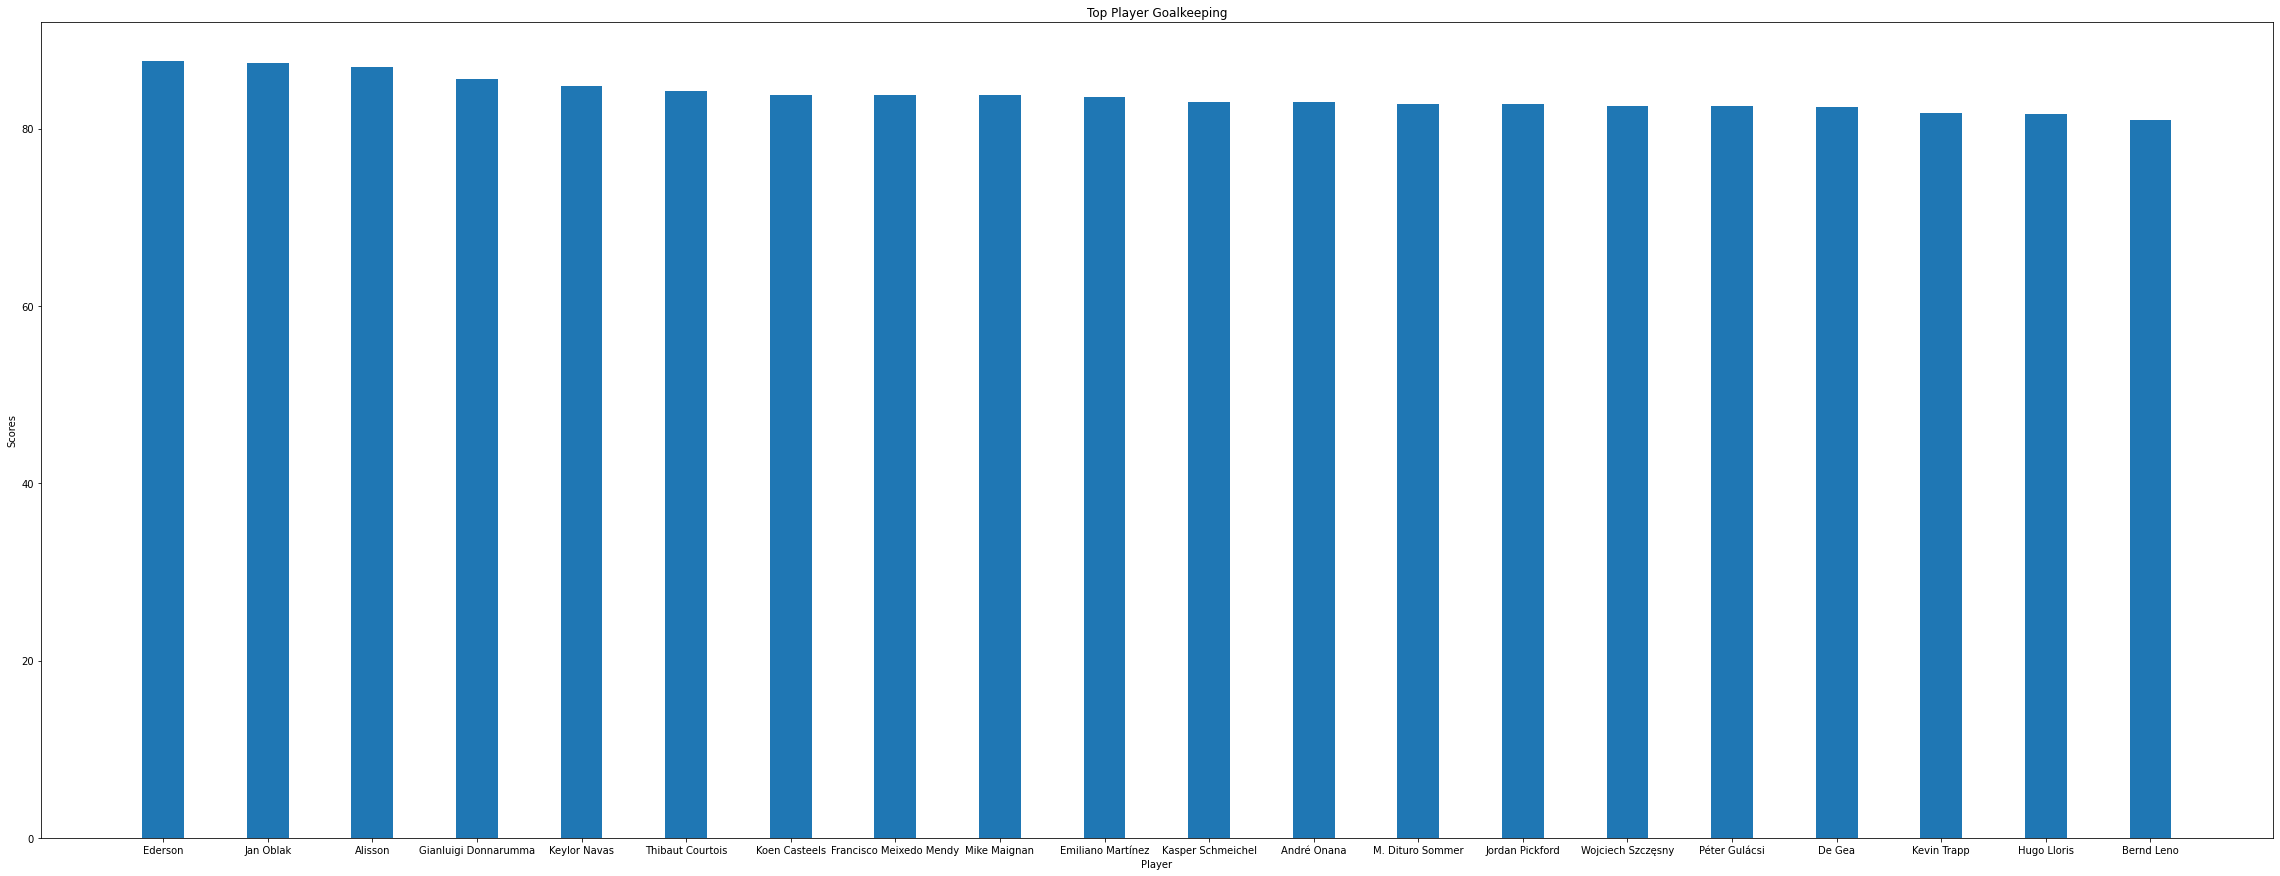

In [73]:
# Top 20 cầu thủ có Goalkeeping cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Goalkeeping FROM table ORDER BY Goalkeeping DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Goalkeeping'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Scores")
plt.title("Top Player Goalkeeping")
plt.savefig('Top_20_cau_thu_co_Goalkeeping_cao_nhat.png', transparent=True, bbox_inches='tight')

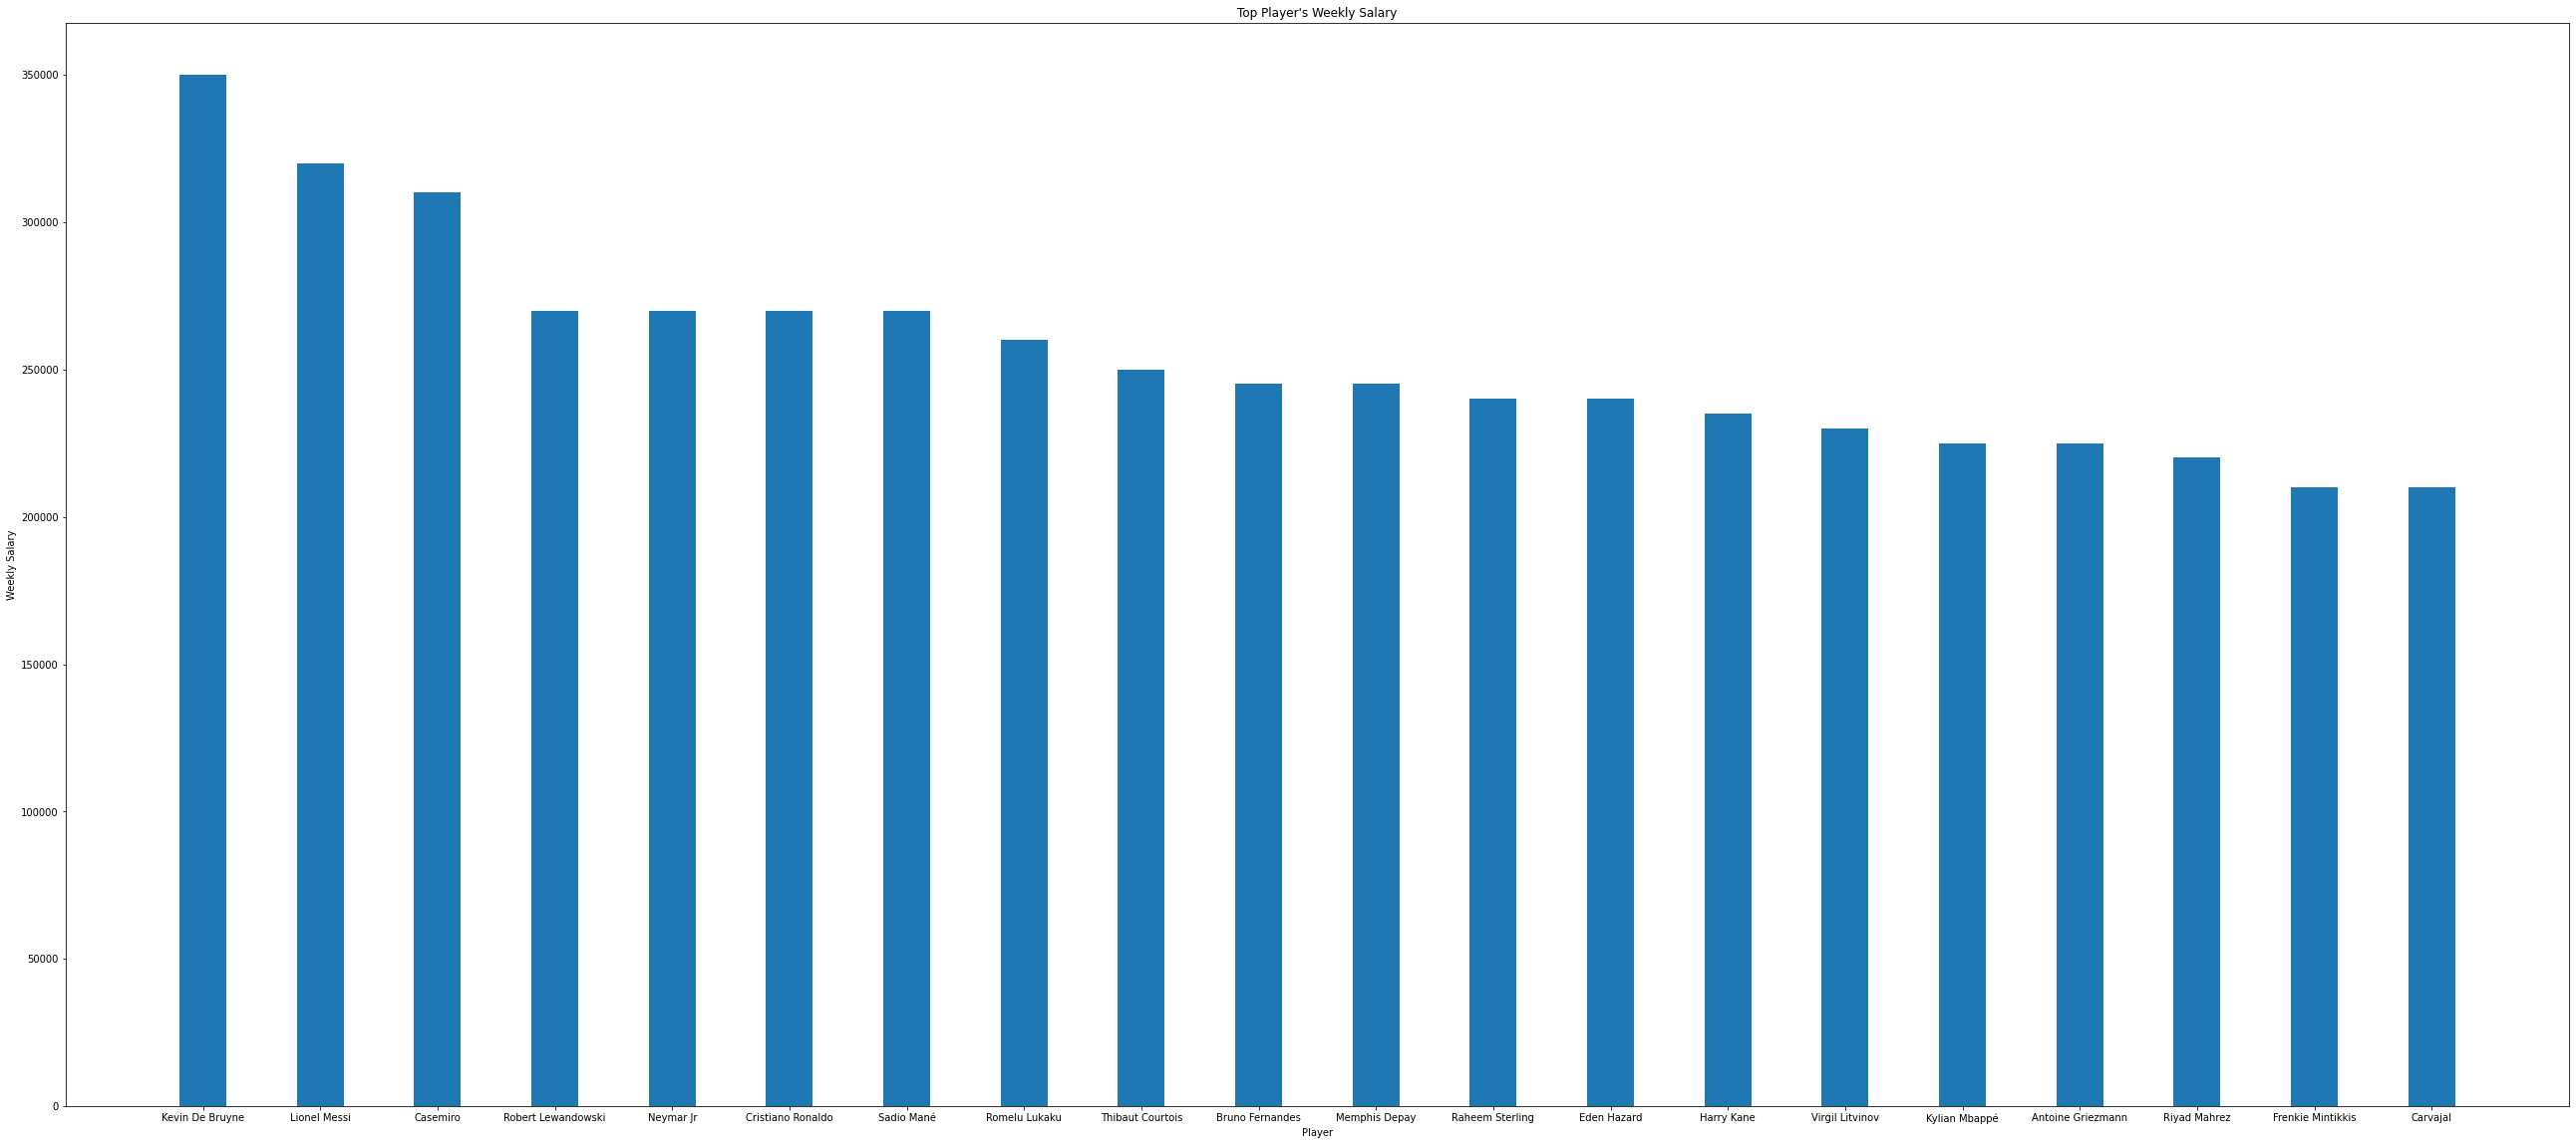

In [76]:
# Top 20 max players's weekly salary
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Player, Weekly_Salary FROM table ORDER BY Weekly_Salary DESC;")
df1 = df.toPandas()
plt.figure(figsize=(45, 20))
plt.bar(df1['Player'].to_numpy()[0:20], df1['Weekly_Salary'].to_numpy()[0:20], width=0.4)
plt.xlabel("Player")
plt.ylabel("Weekly Salary")
plt.title("Top Player's Weekly Salary")
plt.savefig('Top_20_cau_thu_co_luong_hang_tuan_cao_nhat.png', transparent=True, bbox_inches='tight')

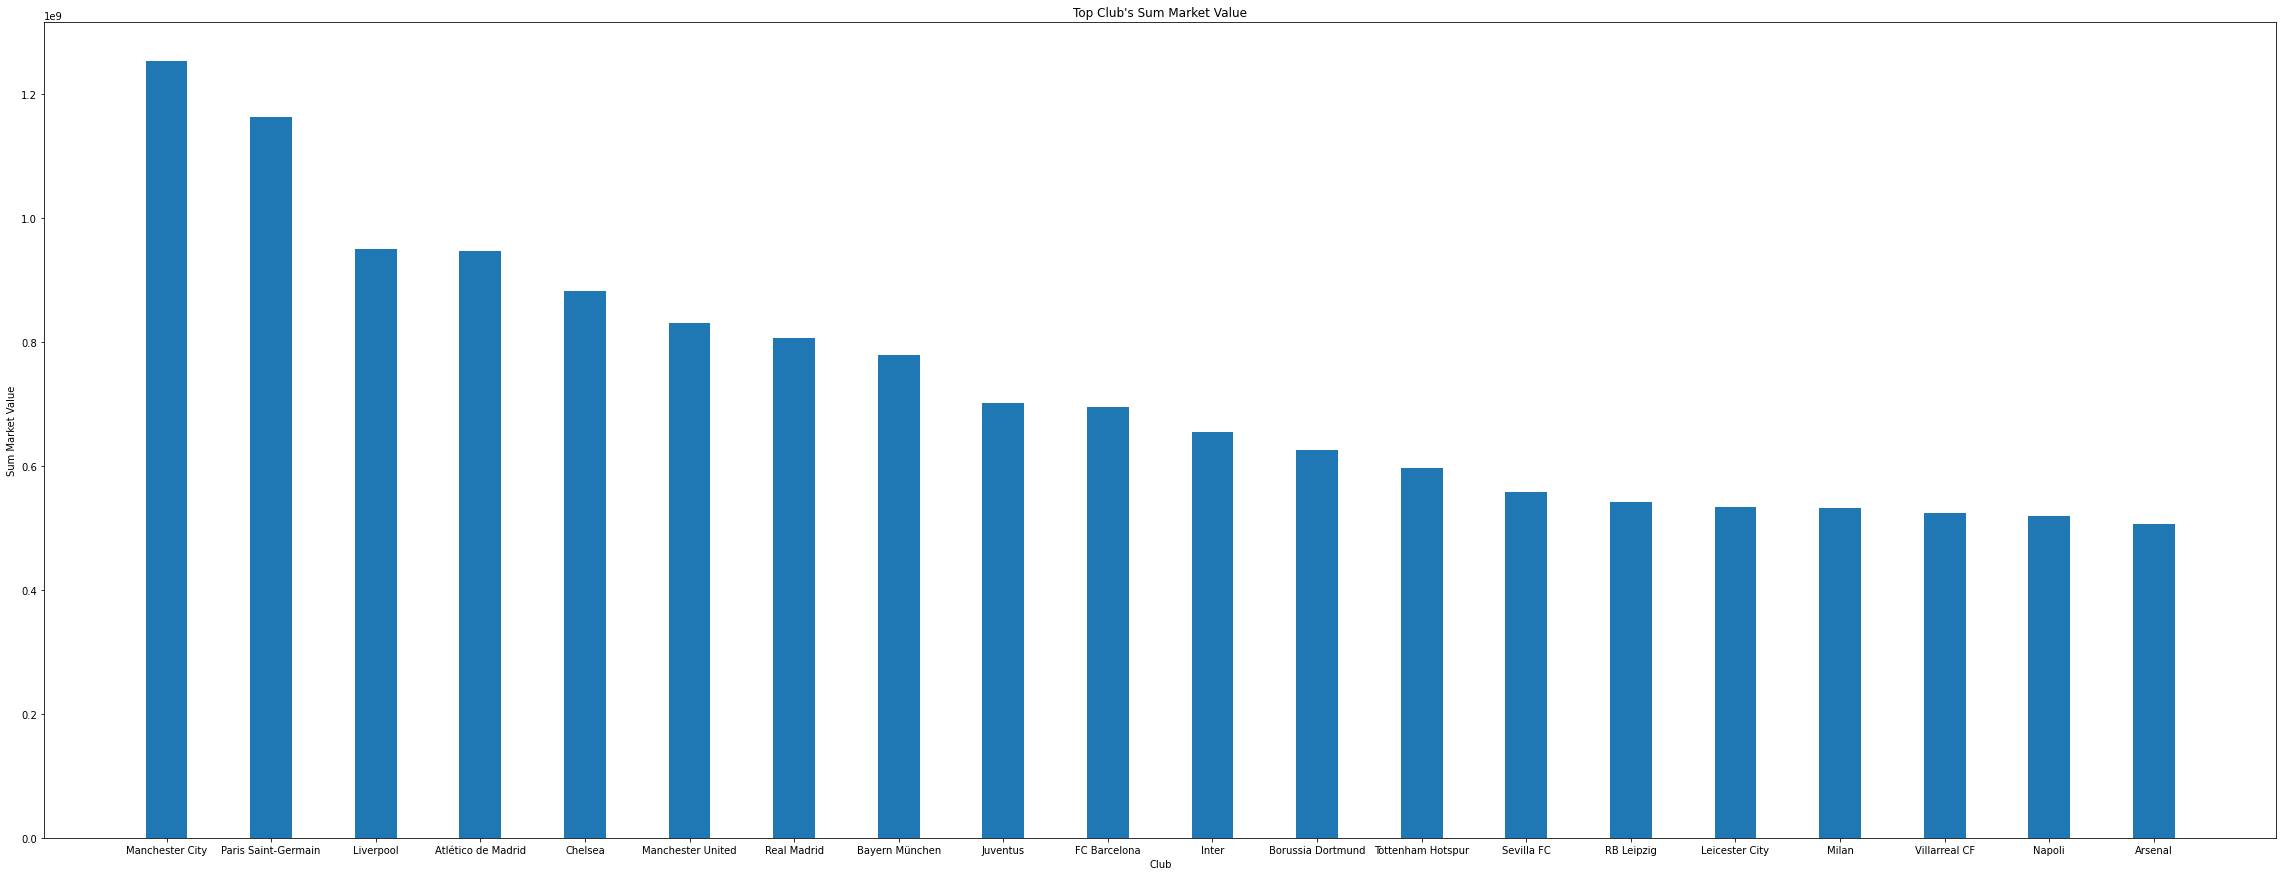

In [75]:
# Top 20 Clubs have max sum market value
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, SUM(Market_Value) AS Sum_Market_Value FROM table GROUP BY Club ORDER BY Sum_Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['Sum_Market_Value'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("Sum Market Value")
plt.title("Top Club's Sum Market Value")
plt.savefig('Top_20_CLB_co_tong_gia_tri_chuyen_nhuong_cau_thu_cao_nhat.png', transparent=True, bbox_inches='tight')

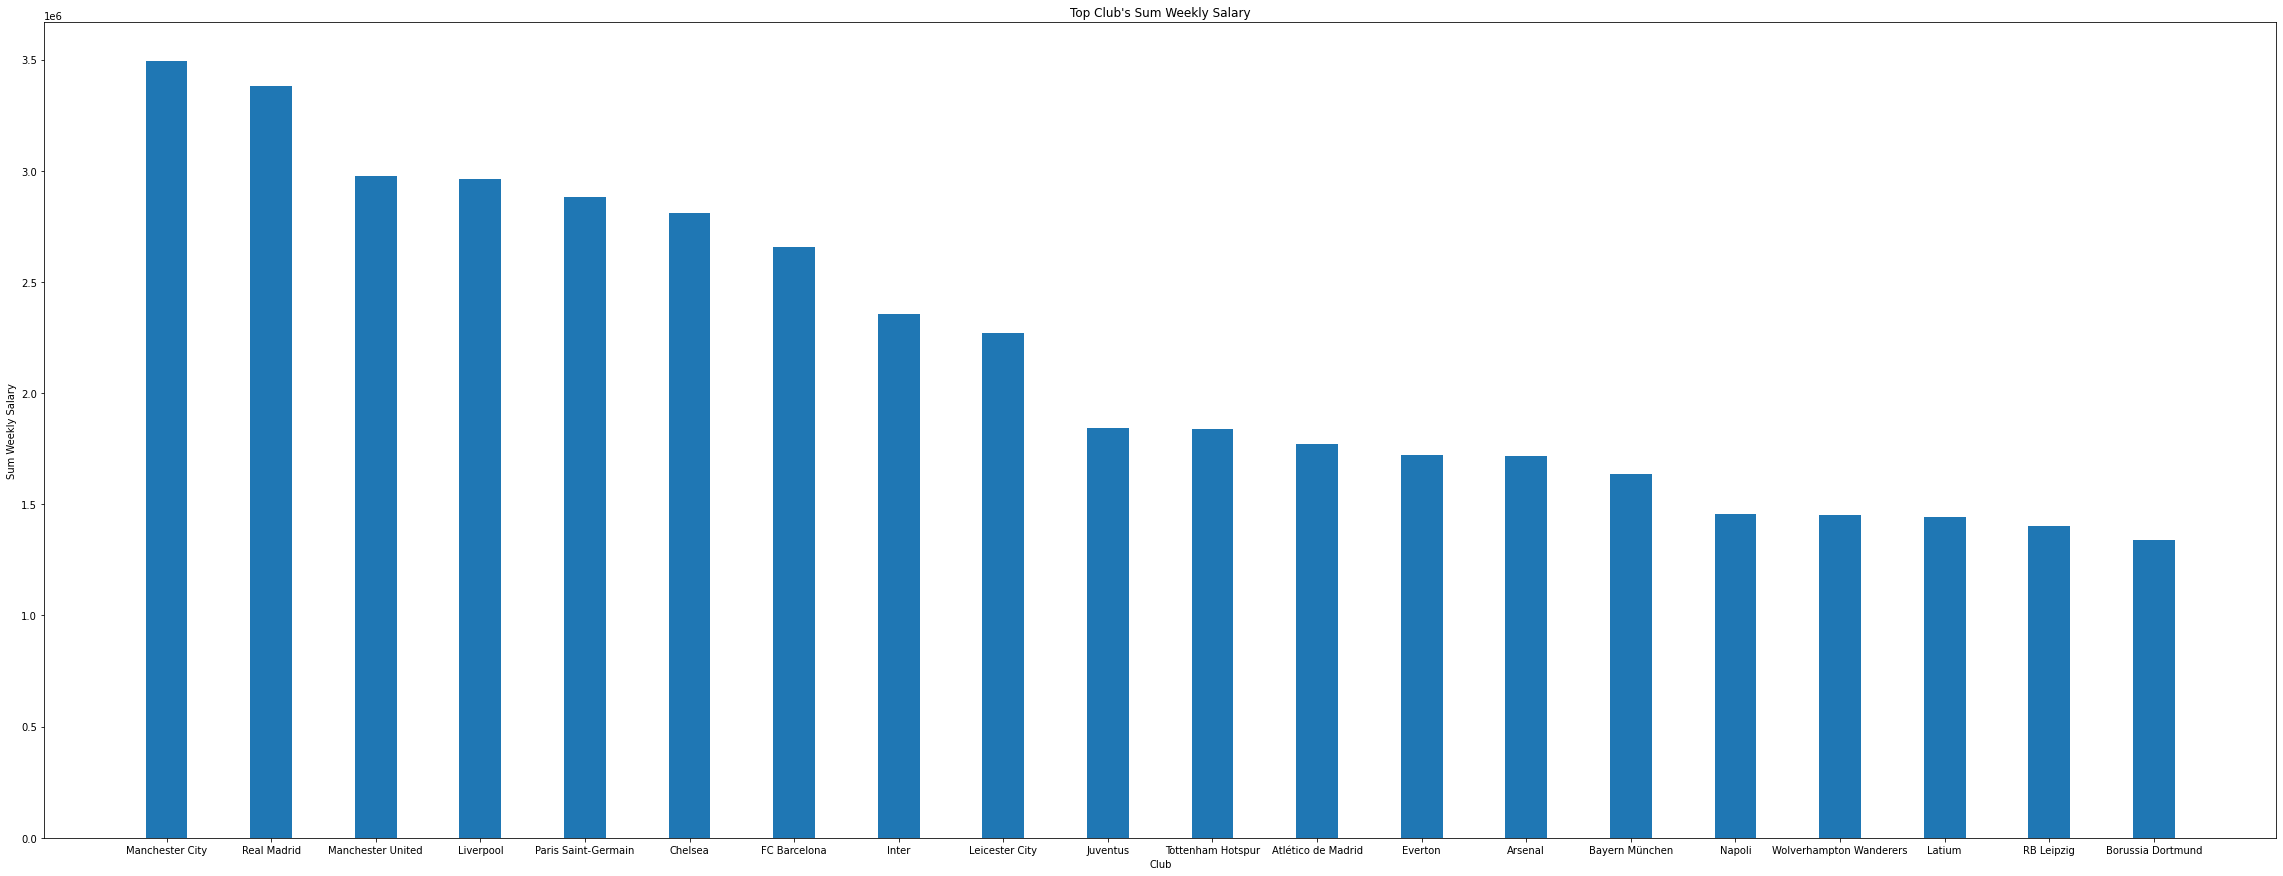

In [77]:
# Top 20 Clubs have max sum weekly salary
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, SUM(Weekly_Salary) AS Sum_Weekly_Salary FROM table GROUP BY Club ORDER BY Sum_Weekly_Salary DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['Sum_Weekly_Salary'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("Sum Weekly Salary")
plt.title("Top Club's Sum Weekly Salary")
plt.savefig('Top_20_CLB_co_tong_luong_hang_tuan_cao_nhat.png', transparent=True, bbox_inches='tight')

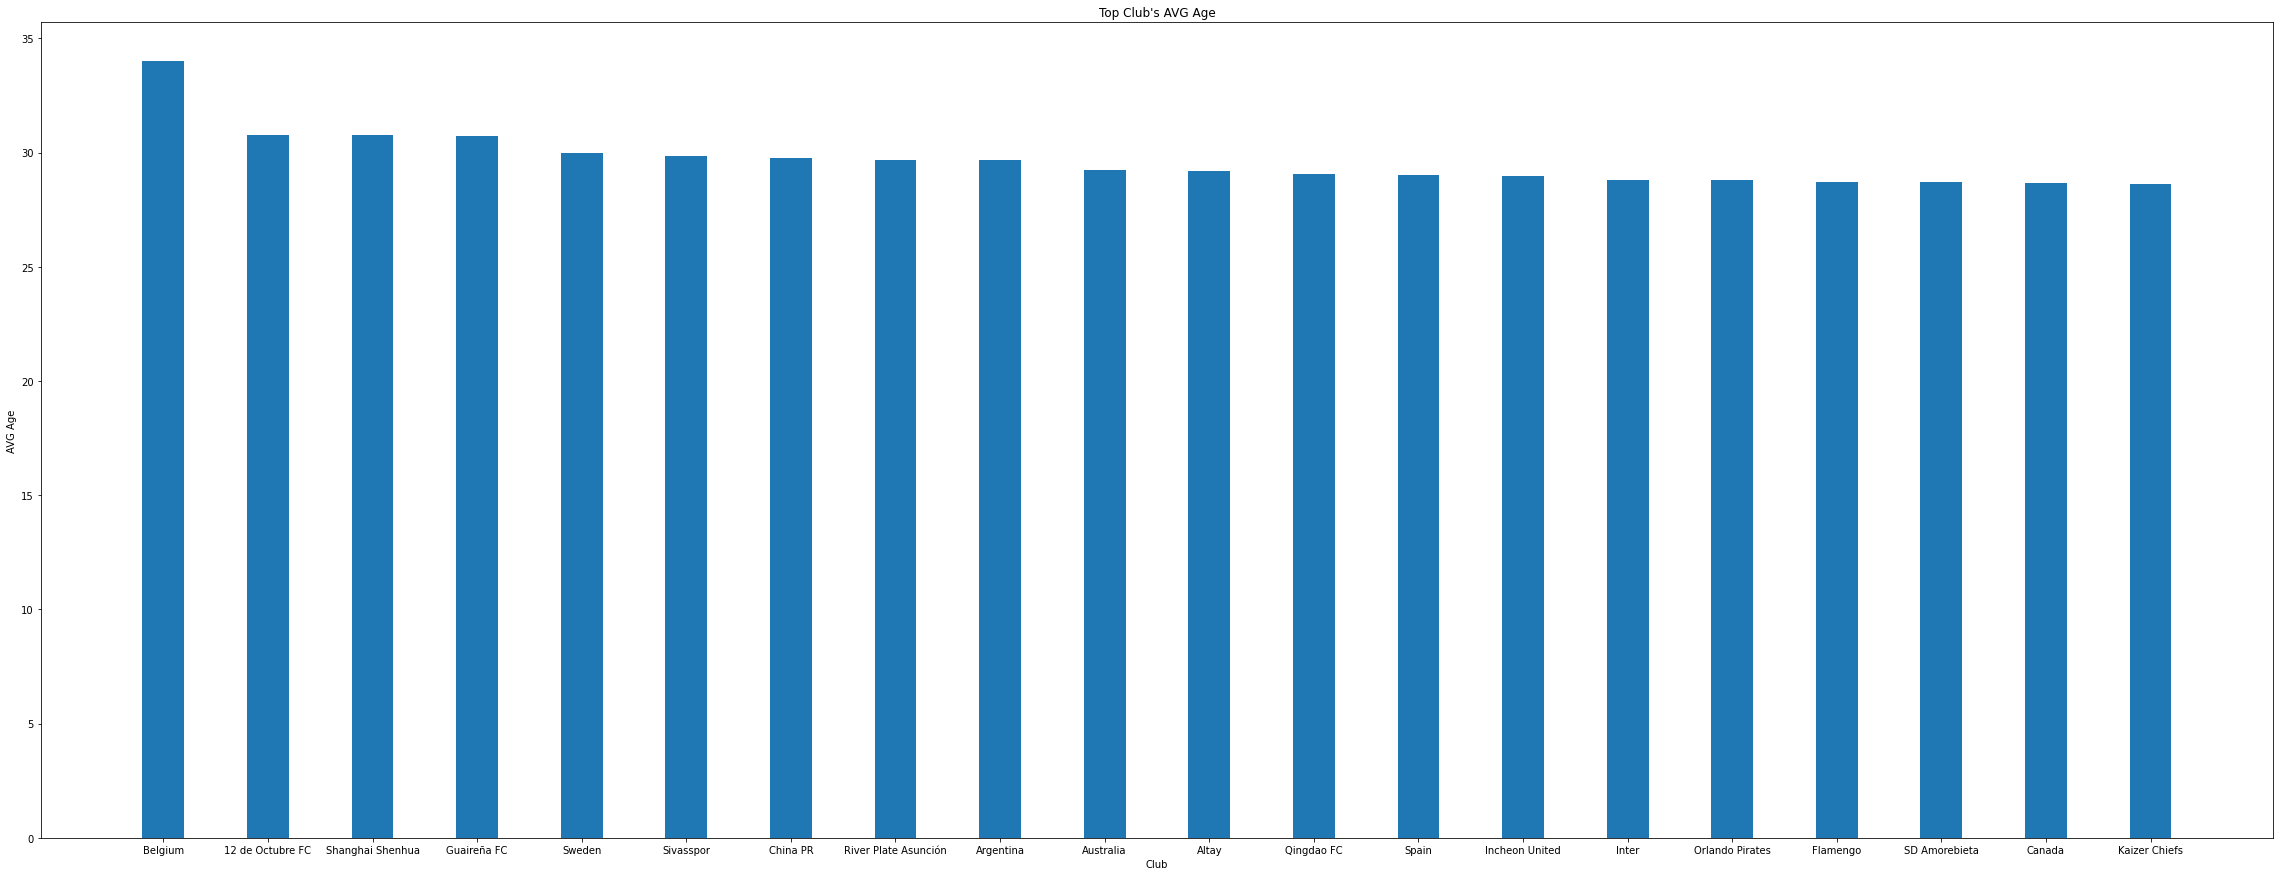

In [78]:
# Top 20 CLB có độ tuổi trung bình lớn nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, AVG(AGE) AS AVG_Age FROM table GROUP BY Club ORDER BY AVG_Age DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['AVG_Age'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("AVG Age")
plt.title("Top Club's AVG Age")
plt.savefig('Top_20_CLB_co_do_tuoi_trung_binh_cao_nhat.png', transparent=True, bbox_inches='tight')

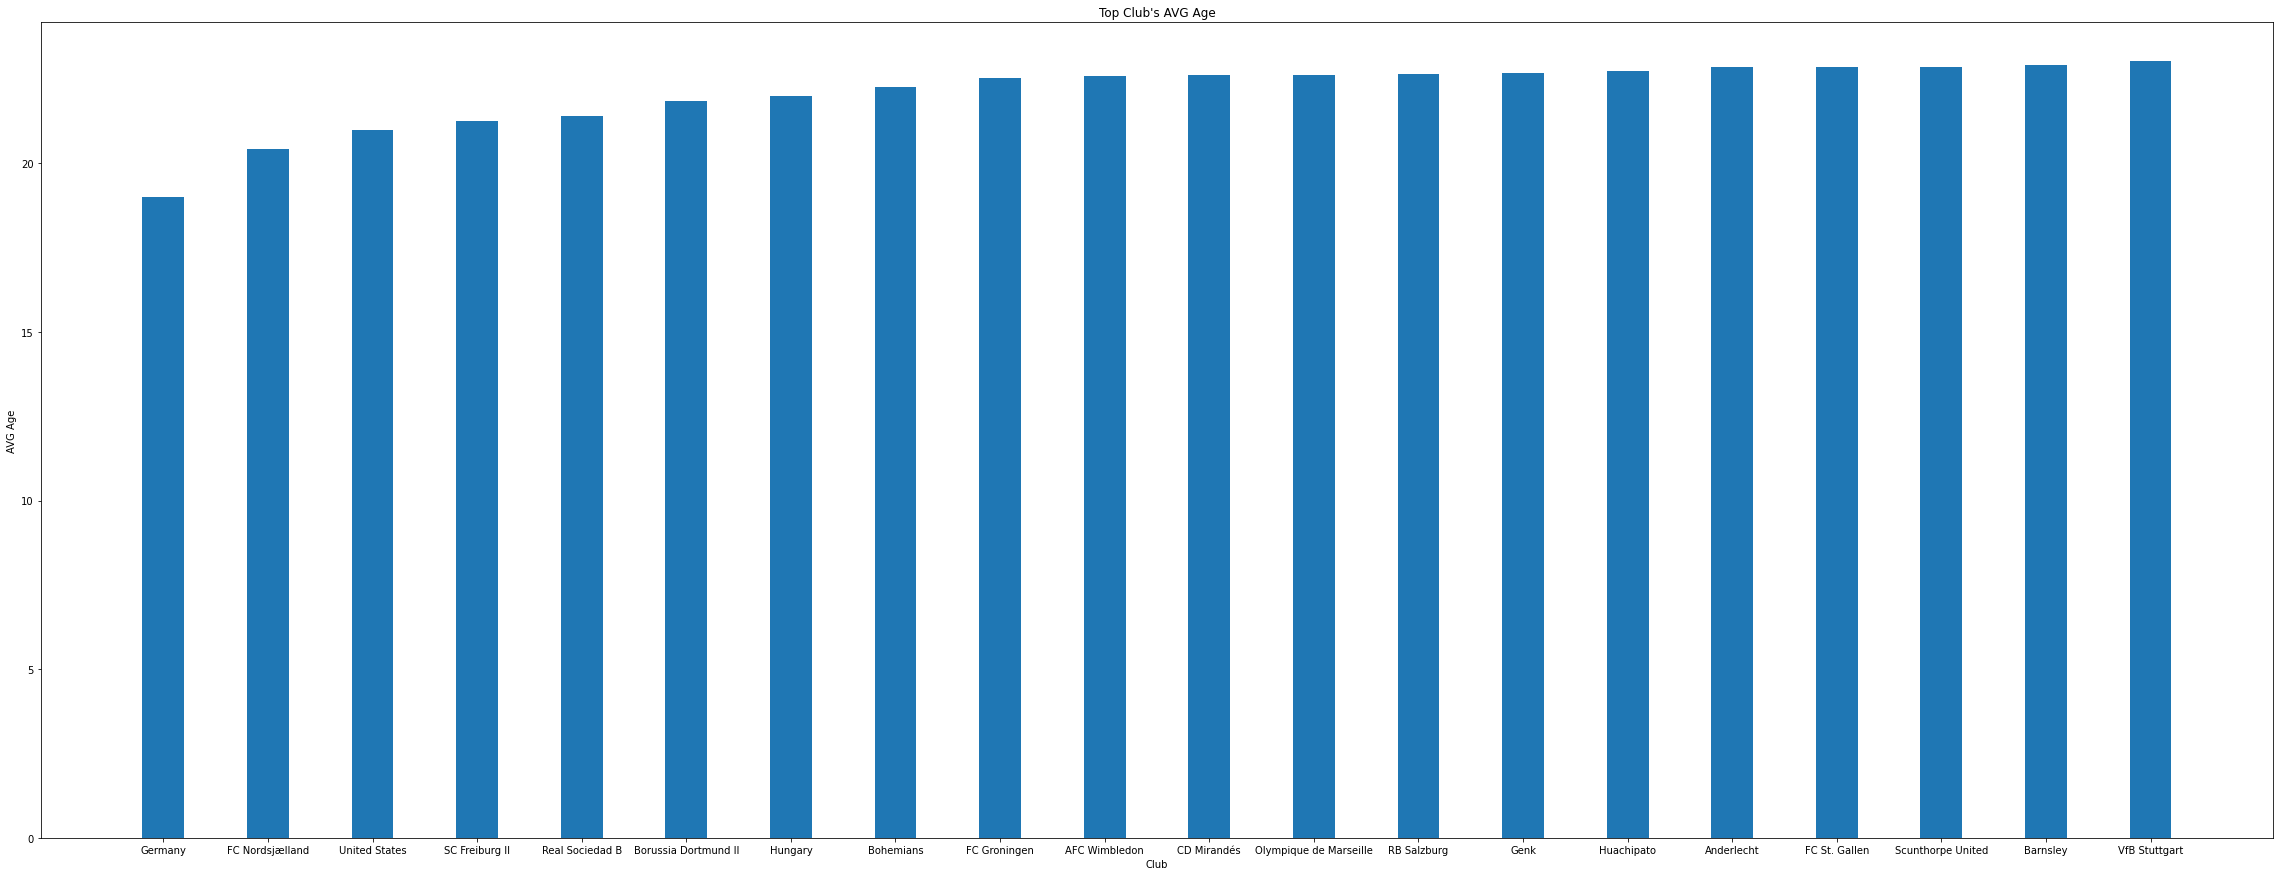

In [79]:
# Top 20 CLB có độ tuổi trung bình nhỏ nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, AVG(AGE) AS AVG_Age FROM table GROUP BY Club ORDER BY AVG_Age ASC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['AVG_Age'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("AVG Age")
plt.title("Top Club's AVG Age")
plt.savefig('Top_20_CLB_co_do_tuoi_trung_binh_thap_nhat.png', transparent=True, bbox_inches='tight')

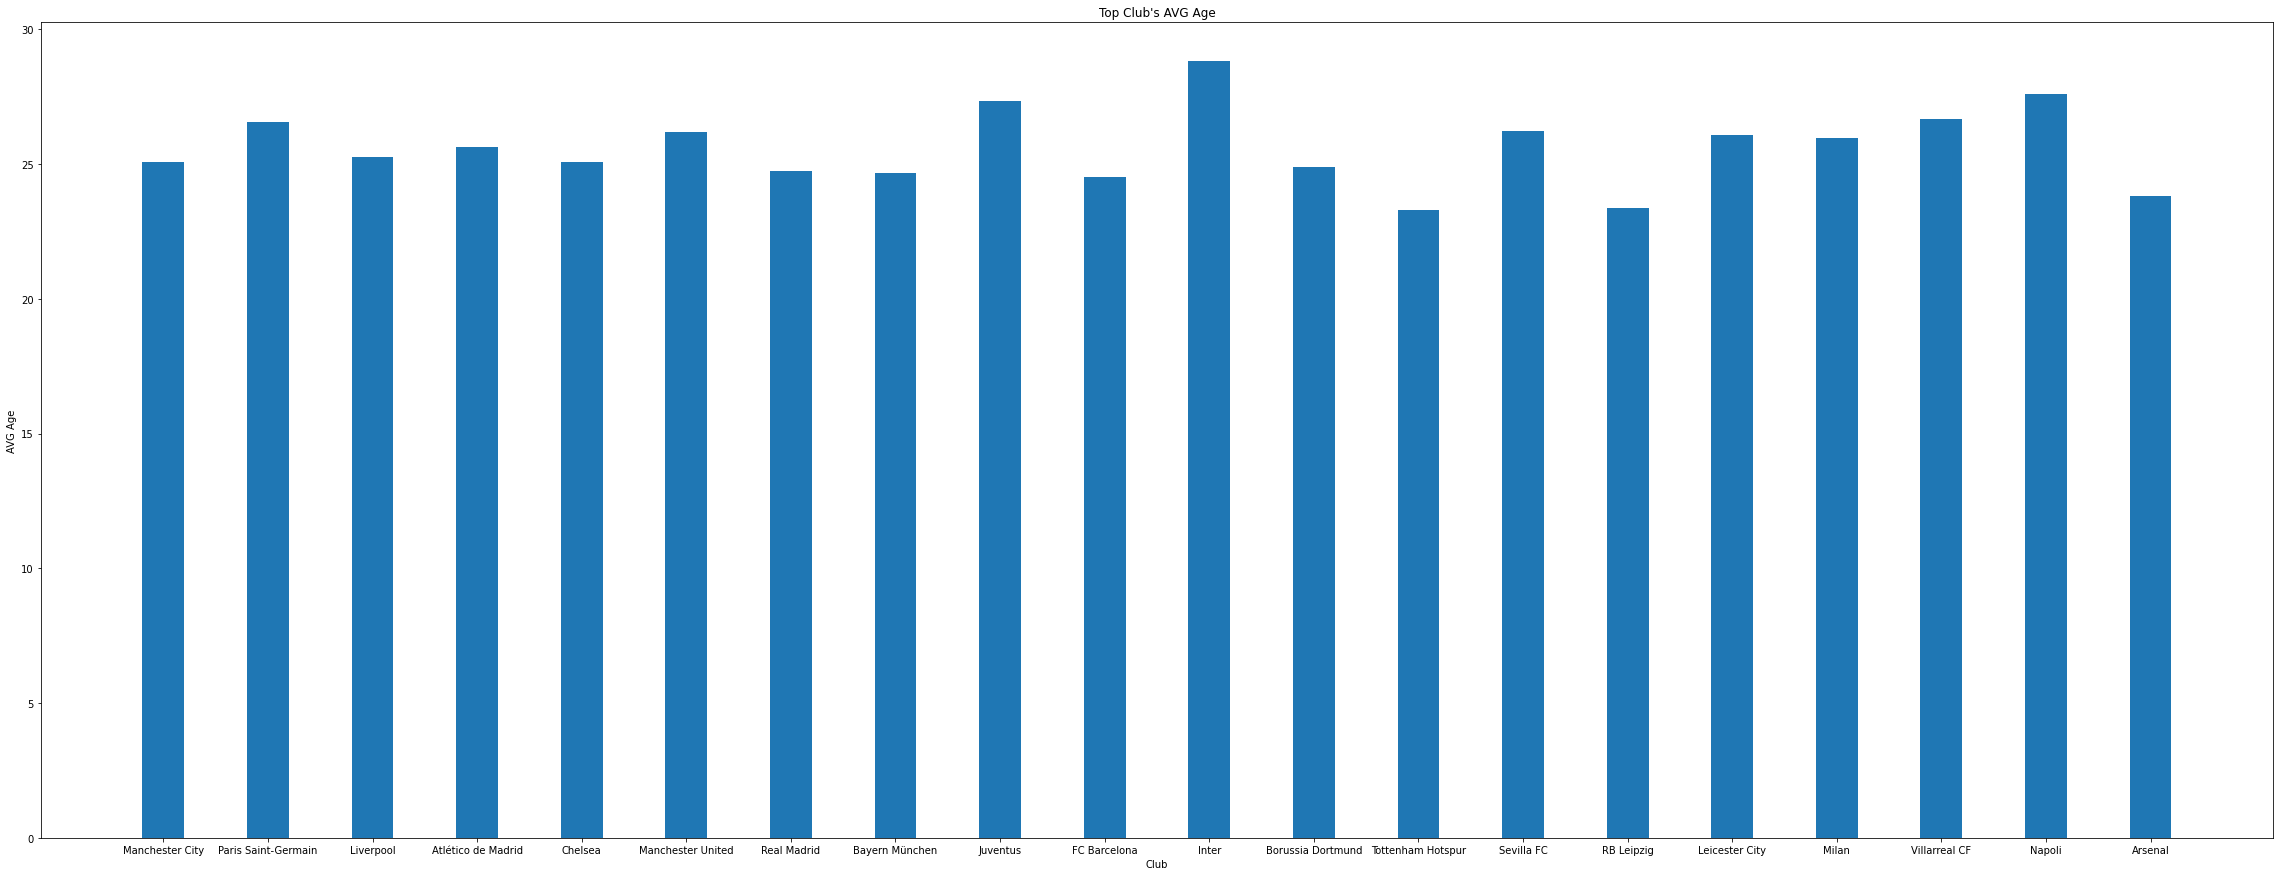

In [80]:
# Độ tuổi trung bình của top 20 CLB có giá trị chuyển nhượng cầu thủ cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, SUM(Market_Value) AS Sum_Market_Value, AVG(Age) AS AVG_Age FROM table GROUP BY Club ORDER BY Sum_Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['AVG_Age'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("AVG Age")
plt.title("Top Club's AVG Age")
plt.savefig('Do_tuoi_trung_binh_cua_20_CLB_co_tong_gia_tri_chuyen_nhuong_cau_thu_lon_nhat.png', transparent=True, bbox_inches='tight')

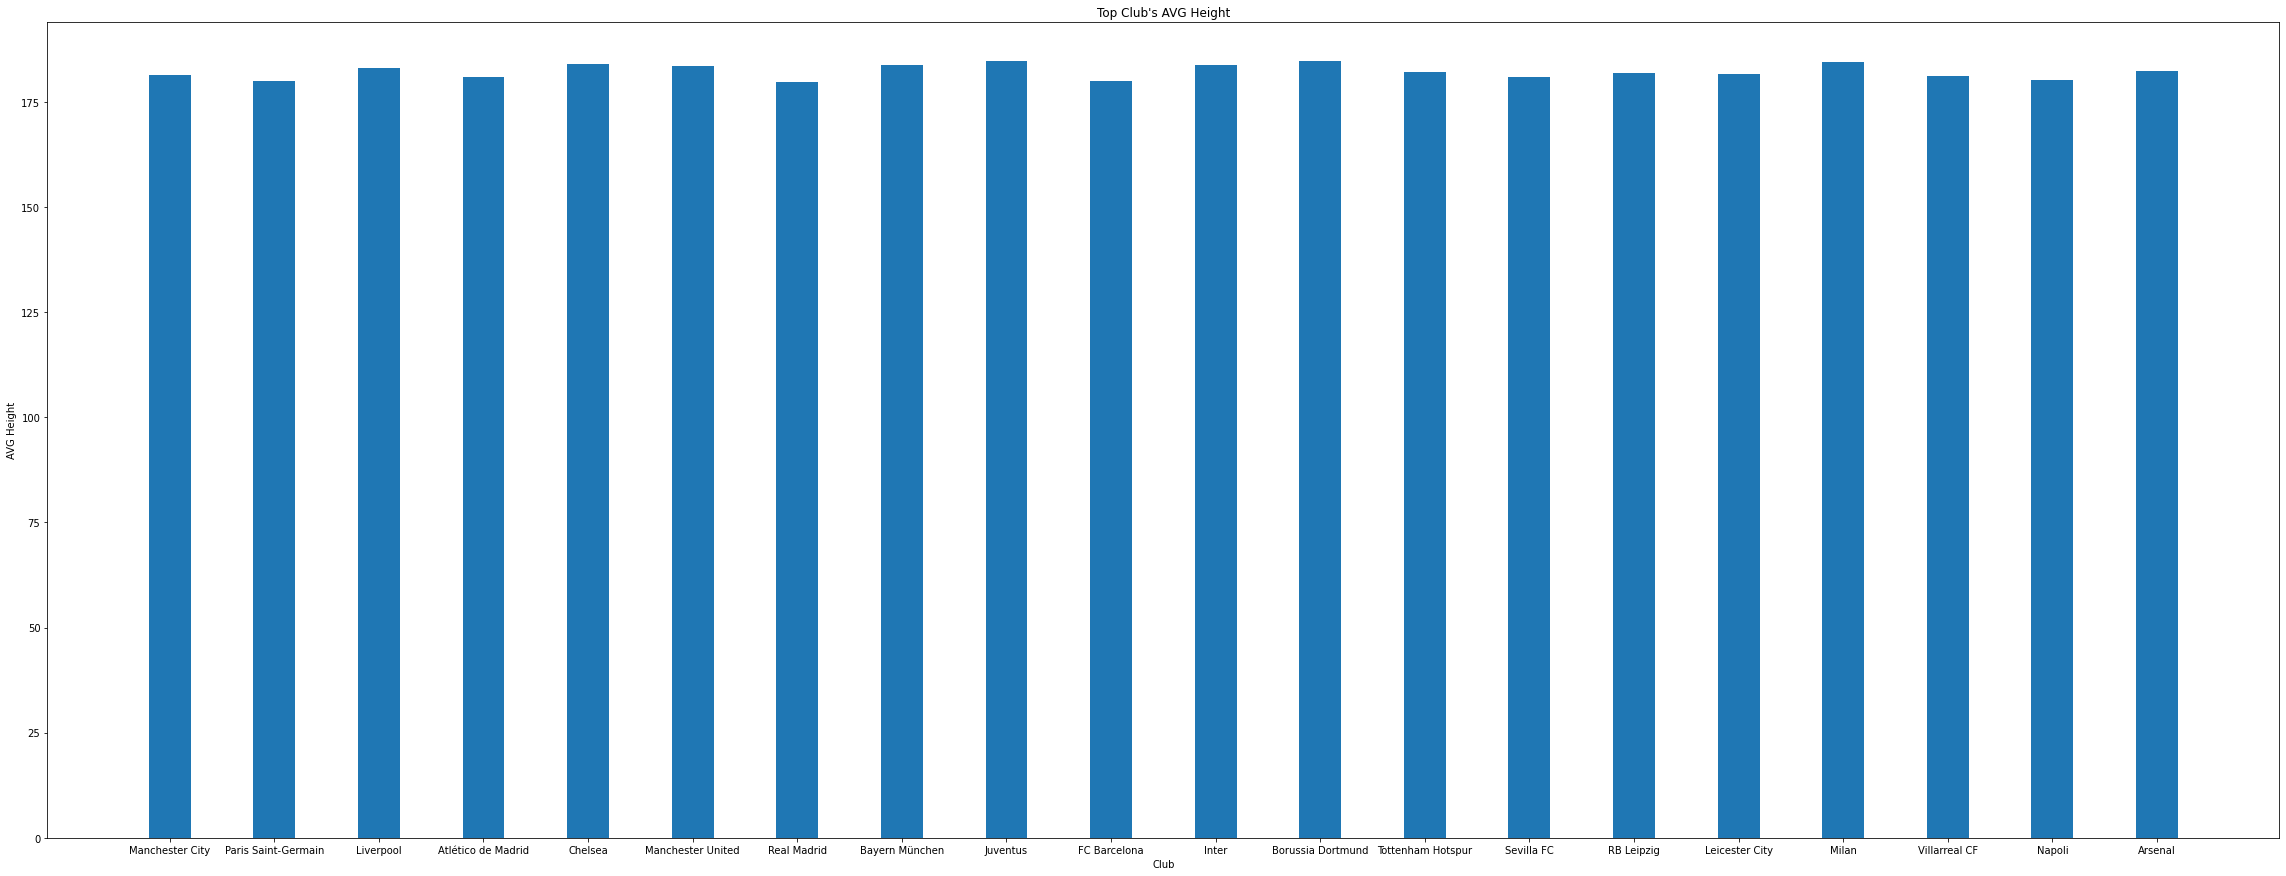

In [82]:
# Chiều cao trung bình của top 20 CLB có giá trị chuyển nhượng cầu thủ cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, SUM(Market_Value) AS Sum_Market_Value, AVG(Height) AS AVG_Height FROM table GROUP BY Club ORDER BY Sum_Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['AVG_Height'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("AVG Height")
plt.title("Top Club's AVG Height")
plt.savefig('Chieu_cao_trung_binh_cua_20_CLB_co_tong_gia_tri_chuyen_nhuong_cau_thu_lon_nhat.png', transparent=True, bbox_inches='tight')

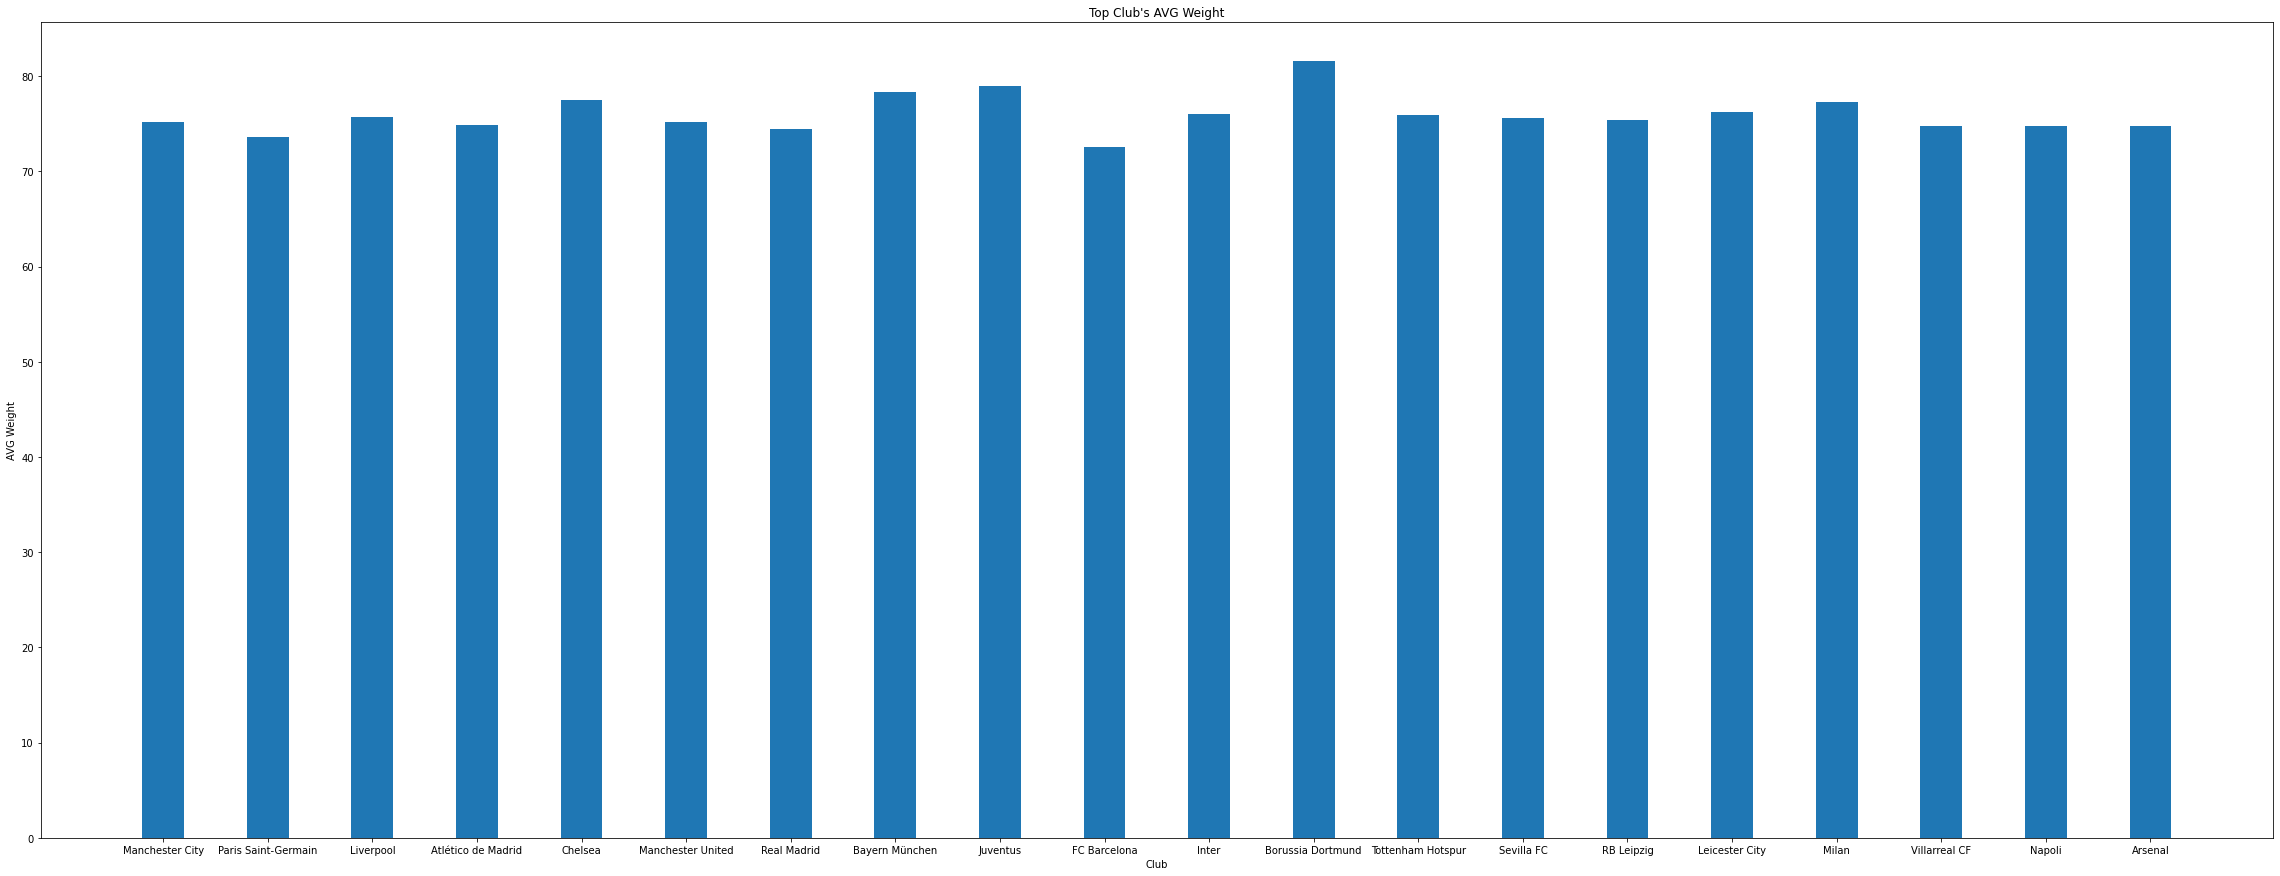

In [83]:
# Cân nặng trung bình của top 20 CLB có giá trị chuyển nhượng cầu thủ cao nhất
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Club, SUM(Market_Value) AS Sum_Market_Value, AVG(Weight) AS AVG_Weight FROM table GROUP BY Club ORDER BY Sum_Market_Value DESC;")
df1 = df.toPandas()
plt.figure(figsize=(40, 15))
plt.bar(df1['Club'].to_numpy()[0:20], df1['AVG_Weight'].to_numpy()[0:20], width=0.4)
plt.xlabel("Club")
plt.ylabel("AVG Weight")
plt.title("Top Club's AVG Weight")
plt.savefig('Can_nang_trung_binh_cua_20_CLB_co_tong_gia_tri_chuyen_nhuong_cau_thu_lon_nhat.png', transparent=True, bbox_inches='tight')

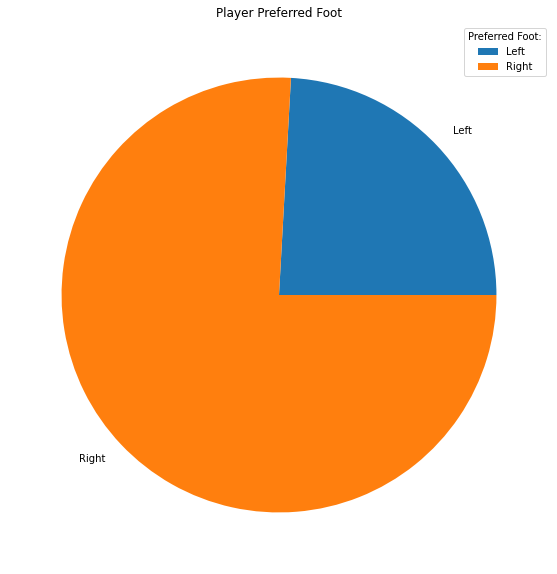

In [84]:
dataset.createOrReplaceTempView("table")
df = spark.sql("SELECT Preferred_Foot, COUNT(Player) AS Sum_Player FROM table GROUP BY Preferred_Foot;")
df1 = df.toPandas()
plt.figure(figsize=(10, 10))
plt.pie(df1['Sum_Player'].to_numpy(), labels = df1['Preferred_Foot'].to_numpy())
plt.title("Player Preferred Foot")
plt.legend(title="Preferred Foot:")
plt.savefig('Ty_le_cau_thu_thuan_chan_trai_phai.png', transparent=True, bbox_inches='tight')